# Preliminary Timeseries and Data Aggregation

In [1]:
#dataframe, plotting, and statistical libraries
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import scipy as sp
import datetime as dt

In [12]:
#matplotlib ~aesthetics~ updated 23 Feb 2023
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['ytick.labelsize'] = 30
mpl.rcParams['xtick.labelsize'] = 30
plt.rcParams['figure.figsize'] = [18, 12]
plt.rcParams["axes.labelweight"] = "bold"
np.set_printoptions(suppress=True)
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["savefig.facecolor"]= '#FFFFFF'
mpl.rcParams['lines.markersize'] = 10
mpl.rcParams['font.size']= 36

# Data Preprocessing

## AE33

In [3]:
#file path and file names for AE33 data
base = '/Users/jdabutler/Documents/+github/rx burn/field data/AE33/csv/'
day1 = 'day1_20210420.csv'
day2 = 'day2_20210421.csv'
day3 = 'day3_20210422.csv'
day4 = 'day4_20210423.csv'

#load each day of AE33 into a dataframe; combine date and time into one column datetime; print out column headers for AE33
df1 = pd.read_csv(base + day1,parse_dates =[['Date(yyyy/MM/dd)','Time(hh:mm:ss)']])
df2 = pd.read_csv(base + day2,parse_dates =[['Date(yyyy/MM/dd)','Time(hh:mm:ss)']])
df3 = pd.read_csv(base + day3,parse_dates =[['Date(yyyy/MM/dd)','Time(hh:mm:ss)']])
df4 = pd.read_csv(base + day4,parse_dates =[['Date(yyyy/MM/dd)','Time(hh:mm:ss)']])
df1 = df1.rename(columns = {'Date(yyyy/MM/dd)_Time(hh:mm:ss)':'datetime'})
df2 = df2.rename(columns = {'Date(yyyy/MM/dd)_Time(hh:mm:ss)':'datetime'})
df3 = df3.rename(columns = {'Date(yyyy/MM/dd)_Time(hh:mm:ss)':'datetime'})
df4 = df4.rename(columns = {'Date(yyyy/MM/dd)_Time(hh:mm:ss)':'datetime'})
df1['datetime'] = df1.datetime + dt.timedelta(seconds=20)
df2['datetime'] = df2.datetime + dt.timedelta(seconds=20)
df3['datetime'] = df3.datetime + dt.timedelta(seconds=20)
df4['datetime'] = df4.datetime + dt.timedelta(seconds=20)

#set index of AE33 dataframes for each day to datetime
df1 = df1.set_index('datetime')
df2 = df2.set_index('datetime')
df3 = df3.set_index('datetime')
df4 = df4.set_index('datetime')

# Drop AE33 data when not sampling; resample AE33 data on timebase; establish indexing dates
df1s = df1[df1.Status == 0]
df2s = df2[df2.Status == 0]
df3s = df3[df3.Status == 0]
df4s = df4[df4.Status.isin([0,128])]

## ABCD

In [4]:
#file path and file names for raw ABCD data
baseABCD = '/Users/jdabutler/Documents/+github/rx burn/field data/ABCD - ground/raw/'
c138 = 'C138/I87.csv'
c52 = 'C52/I87.csv'
c133 = 'C133/I87.csv'
ABCD_header = ["time","refVolt","sigVolt","ATN","BC","RH","temp","FR","Vbatt"]

#load in each day of raw, uncorrected ABCD data
df138 = pd.read_csv(baseABCD + c138, names = ABCD_header)
df52 = pd.read_csv(baseABCD + c52, names = ABCD_header)
df133 = pd.read_csv(baseABCD + c133, names = ABCD_header)

#file path and file names for corrected ABCD data
bABCD = '/Users/jdabutler/Documents/+github/rx burn/field data/ABCD - ground/'
d1_52 =  'C52 - d1/I87.csv'
d1_138 = 'C138 - d1/I87_QAQC_minutely.csv'
d2_133 = 'C133 - d2/I87_QAQC_minutely.csv'
d2_138 = 'C138 - d2/I87_QAQC_minutely.csv'
d3_133 = 'C133 - d3/I87_QAQC_minutely.csv'
d3_138 = 'C138 - d3/I87_QAQC_minutely.csv'
d4_133 = 'C133 - d4/I87_QAQC_minutely.csv'

d152 = pd.read_csv(bABCD + d1_52,names = ABCD_header)
d1138 = pd.read_csv(bABCD + d1_138,names = ABCD_header)
d2133 = pd.read_csv(bABCD + d2_133,names = ABCD_header)
d2138 = pd.read_csv(bABCD + d2_138,names = ABCD_header)
d3133 = pd.read_csv(bABCD + d3_133,names = ABCD_header)
d3138 = pd.read_csv(bABCD + d3_138,names = ABCD_header)
d4133 = pd.read_csv(bABCD + d4_133,names = ABCD_header)

#set the attenutation tolerance and create a boolean mask for each cell where this tolerance is exceeded
ATN_tol = 100
mask138 = df138.ATN >= ATN_tol
mask52 = df52.ATN >= ATN_tol
mask133 = df133.ATN >= ATN_tol

#replace any attentation values greater than or equal to the tolerance as a NaN
df138.loc[mask138,'ATN'] = np.nan
df52.loc[mask52,'ATN'] = np.nan
df133.loc[mask133,'ATN'] = np.nan

#covert epoch time in ABCD data to datetime dtype
df138.time = pd.to_datetime(df138.time,unit = 's')
df52.time = pd.to_datetime(df52.time,unit = 's')
df133.time = pd.to_datetime(df133.time,unit = 's')

#set index of three cell dataframes to datetime column
df138 = df138.set_index('time')
df52 = df52.set_index('time')
df133 = df133.set_index('time')

## BC dataframes with different time bases

In [6]:
# 1-minute averaged AE33 and ABCD data
timebase = '1T'
df1T = df1s.resample(timebase).mean()
df2T = df2s.resample(timebase).mean()
df3T = df3s.resample(timebase).mean()
df4T = df4s.resample(timebase).mean()
df138T = df138.resample(timebase).mean()
df52T = df52.resample(timebase).mean()
df133T = df133.resample(timebase).mean()

In [7]:
# save here, do once
# save combined AE33 and ABCD dataframes
path = '/Users/jdabutler/Documents/+github/rx burn/unaligned AE33 + ABCD/'

## Gases - CO, CO2, NO, NO2, NOx

In [8]:
#file path for NO, NO2, NOx, CO, and CO2 data
baseGas = '/Users/jdabutler/Documents/+github/rx burn/field data/Gas Data 2021-07'
d1gas = r'day1_20210420_1min_gas.csv'
d2gas = r'day2_20210421_1min_gas.csv'
d3gas = r'day3_20210422_1min_gas.csv'
d4gas = r'day4_20210423_1min_gas.csv'
d1co2 = r'day1_20210420_1min_co2.csv'
d2co2 = r'day2_20210421_1min_co2.csv'
d3co2 = r'day3_20210422_1min_co2.csv'
d4co2 = r'day4_20210423_1min_co2.csv'
d1lc = r'day1_20210420_1min_licor.csv'
d2lc = r'day2_20210421_1min_licor.csv'
d3lc = r'day3_20210422_1min_licor.csv'
d4lc = r'day4_20210423_1min_licor.csv'

#load in each day of gas data
df1g = pd.read_csv(baseGas + '/' + d1gas)
df2g = pd.read_csv(baseGas + '/' + d2gas)
df3g = pd.read_csv(baseGas + '/' + d3gas)
df4g = pd.read_csv(baseGas + '/' + d4gas)
df1co2 = pd.read_csv(baseGas + '/' + d1co2)
df2co2 = pd.read_csv(baseGas + '/' + d2co2)
df3co2 = pd.read_csv(baseGas + '/' + d3co2)
df4co2 = pd.read_csv(baseGas + '/' + d4co2)
df1lc = pd.read_csv(baseGas + '/' + d1lc)
df2lc = pd.read_csv(baseGas + '/' + d2lc)
df3lc = pd.read_csv(baseGas + '/' + d3lc)
df4lc = pd.read_csv(baseGas + '/' + d4lc)

#convert strings in gas dataframes to datetime dtype
df1g.datetime = pd.to_datetime(df1g.datetime)
df2g.datetime = pd.to_datetime(df2g.datetime)
df3g.datetime = pd.to_datetime(df3g.datetime)
df4g.datetime = pd.to_datetime(df4g.datetime)

#set index of gas dataframes for each day to datetime
df1g = df1g.set_index('datetime')
df2g = df2g.set_index('datetime')
df3g = df3g.set_index('datetime')
df4g = df4g.set_index('datetime')

df1co2['datetime'] = pd.to_datetime('2021-04-20 ' + df1co2.Time)
df2co2['datetime'] = pd.to_datetime('2021-04-21 ' + df2co2.Time)
df3co2['datetime'] = pd.to_datetime('2021-04-22 ' + df3co2.Time)
df4co2['datetime'] = pd.to_datetime('2021-04-23 ' + df4co2.Time)
df1co2 = df1co2.set_index('datetime')
df2co2 = df2co2.set_index('datetime')
df3co2 = df3co2.set_index('datetime')
df4co2 = df4co2.set_index('datetime')

df1lc['datetime'] = pd.to_datetime('2021-04-20 ' + df1lc.Time)
df2lc['datetime'] = pd.to_datetime('2021-04-21 ' + df2lc.Time)
df3lc['datetime'] = pd.to_datetime('2021-04-22 ' + df3lc.Time)
df4lc['datetime'] = pd.to_datetime('2021-04-23 ' + df4lc.Time)
df1lc = df1lc.set_index('datetime')
df2lc = df2lc.set_index('datetime')
df3lc = df3lc.set_index('datetime')
df4lc = df4lc.set_index('datetime')

df1lcT = df1lc.resample(timebase).mean()
df2lcT = df2lc.resample(timebase).mean()
df3lcT = df3lc.resample(timebase).mean()
df4lcT = df4lc.resample(timebase).mean()

## Indexing Datetimes for Burn Starts and Ends

In [9]:
#indexing dates
d1be = pd.to_datetime('2021-04-20 11:56') #day 1 begin with tube error
d1cs = pd.to_datetime('2021-04-20 12:52') #day 1 cell switch from cell 138 to cell 52
d1b = pd.to_datetime('2021-04-20 13:23') #day 1 begin with tube error fixed
d1co = pd.to_datetime('2021-04-20 15:01') #day 1 ABCD and cell 52 turned off
d1s = pd.to_datetime('2021-04-20 16:33') #day 1 smolder begins at new location after filter changes from UCR sampling team

d2b = pd.to_datetime('2021-04-21 11:35') #day 2 next day smolder ends and burn begins
d2b2 = pd.to_datetime('2021-04-21 13:53') #day 2 new location burn start
d2cs = pd.to_datetime('2021-04-21 14:57') #day 2 cell switch from cell 133 to cell 138
d2s = pd.to_datetime('2021-04-21 16:00') #day 2 smolder begins
d2e = pd.to_datetime('2021-04-21 16:57') #day 2 ABCD turned off

d3c = pd.to_datetime('2021-04-22 11:02') #day 3 ABCD turned on
d3b = pd.to_datetime('2021-04-22 11:20') #day 3 burn begins
d3s = pd.to_datetime('2021-04-22 15:36') #day 3 smolder begins
d3e = pd.to_datetime('2021-04-22 23:00') #day 3 ABCD turned off

d4c = pd.to_datetime('2021-04-23 10:00') #day 4 ABCD turned on
d4b1 = pd.to_datetime('2021-04-23 10:34') #day 4 background sample ends burn begins 
d4b2 = pd.to_datetime('2021-04-23 12:09') #day 4 new location burn start
d4s = pd.to_datetime('2021-04-23 14:00') #day 4 smolder emission begin
d4e = pd.to_datetime('2021-04-23 23:00') #day 4 ABCD turned off

## Calculate combustion efficiency

In [10]:
df1CE = pd.merge(df1g,df1co2,how='left',left_index=True,right_index=True,indicator=True)
df2CE = pd.merge(df2g,df2co2,how='left',left_index=True,right_index=True,indicator=True)
df3CE = pd.merge(df3g,df3co2,how='left',left_index=True,right_index=True,indicator=True)
df4CE = pd.merge(df4g,df4co2,how='left',left_index=True,right_index=True,indicator=True)

df1CE['CE'] = df1CE.CO2_cal / (df1CE.CO2_cal + df1CE.CO_cal)
df2CE['CE'] = df2CE.CO2_cal / (df2CE.CO2_cal + df2CE.CO_cal)
df3CE['CE'] = df3CE.CO2_cal / (df3CE.CO2_cal + df3CE.CO_cal)
df4CE['CE'] = df4CE.CO2_cal / (df4CE.CO2_cal + df4CE.CO_cal)

# Pollutant Timeseries 

## Day 1

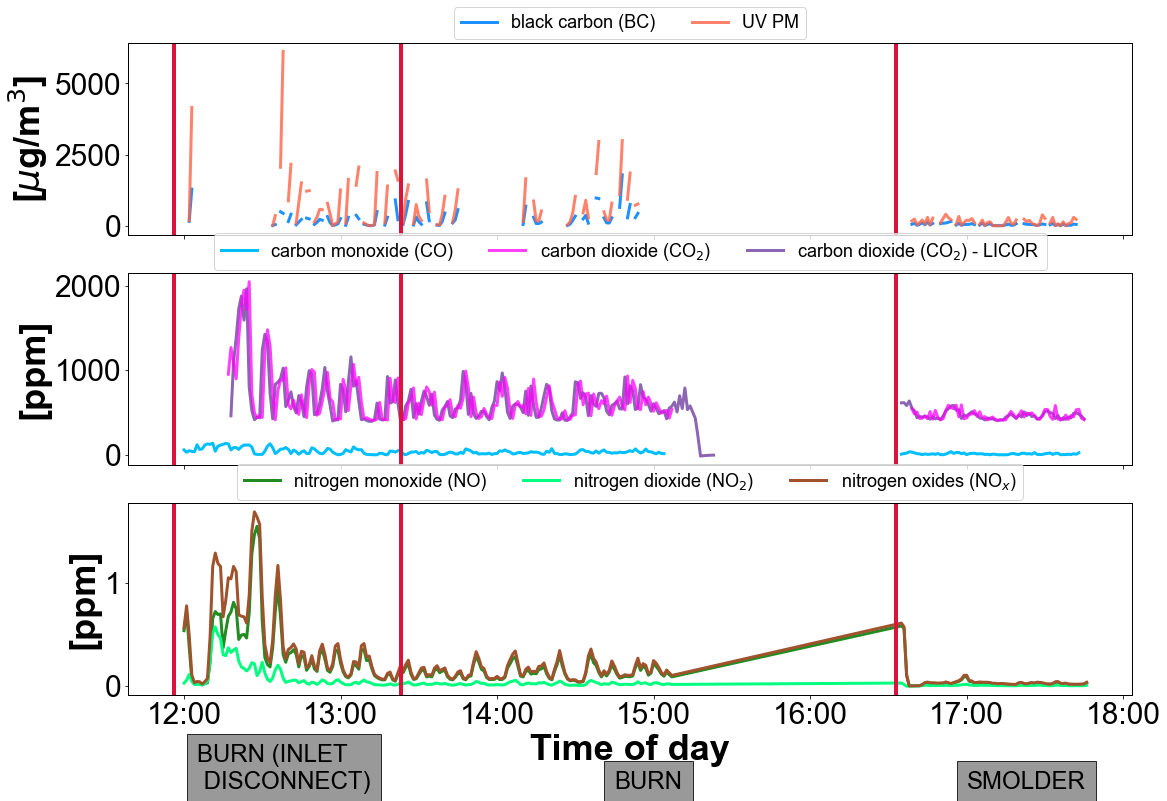

In [13]:
fig, ax = plt.subplots(3,1,sharex = True)

timeFormat = mdates.DateFormatter('%H:%M')

ax[0].plot(df1T.index,df1T.BC6/1000,label = 'black carbon (BC)',color='#1E90FF')
ax[0].plot(df1T.index,df1T.BC1/1000, alpha = 0.8,label='UV PM',color = '#FF6347')
ax[0].set_ylabel('[$\mu$g/m$^3$]',fontsize = 36)
ax[0].axvline(d1be,linewidth=4,color = '#DC143C')
ax[0].axvline(d1b,linewidth=4,color = '#DC143C')
ax[0].axvline(d1s,linewidth=4,color = '#DC143C')
ax[2].text(pd.to_datetime('2021-04-20 12:05'), -1,'BURN (INLET \n DISCONNECT)',fontsize = 24,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax[2].text(pd.to_datetime('2021-04-20 14:45'), -1,'BURN',fontsize = 24,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax[2].text(pd.to_datetime('2021-04-20 17:00'), -1,'SMOLDER',fontsize = 24,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax[0].legend(loc = 8,bbox_to_anchor = (0.5,.97),ncol=3,fontsize=18)

ax[1].plot(df1CE.index,df1CE.CO_cal,label = 'carbon monoxide (CO)',color = '#00BFFF')
ax[1].plot(df1CE.index,df1CE.CO2_cal,label = 'carbon dioxide (CO$_2$)',color = '#FF00FF',zorder = 2,alpha=0.75)
ax[1].plot(df1lcT.index,df1lcT.CO2_licor,label = 'carbon dioxide (CO$_2$) - LICOR',color = '#663399',zorder=1,alpha=0.75)
ax[1].legend(loc = 8,bbox_to_anchor = (0.5,.97),ncol=3,fontsize=18)
ax[1].axvline(d1be,linewidth=4,color = '#DC143C')
ax[1].axvline(d1b,linewidth=4,color = '#DC143C')
ax[1].axvline(d1s,linewidth=4,color = '#DC143C')
ax[1].set_ylabel('[ppm]',fontsize = 36)


ax[2].plot(df1CE.index,df1CE.NO_cal,color='#228B22',label = 'nitrogen monoxide (NO)')
ax[2].plot(df1CE.index,df1CE.NO2_cal,color='#00FF7F',label = 'nitrogen dioxide (NO$_2$)')
ax[2].plot(df1CE.index,df1CE.NOx_cal,color='#A0522D',label = 'nitrogen oxides (NO$_x$)')
ax[2].set_xlabel('Time of day',fontsize = 36)
ax[2].xaxis.set_major_formatter(timeFormat)
ax[2].axvline(d1be,linewidth=4,color = '#DC143C')
ax[2].axvline(d1b,linewidth=4,color = '#DC143C')
ax[2].axvline(d1s,linewidth=4,color = '#DC143C')
ax[2].set_ylabel('[ppm]',fontsize = 36)
ax[2].legend(loc = 8,bbox_to_anchor = (0.5,.97),ncol=3,fontsize=18)

## Day 2

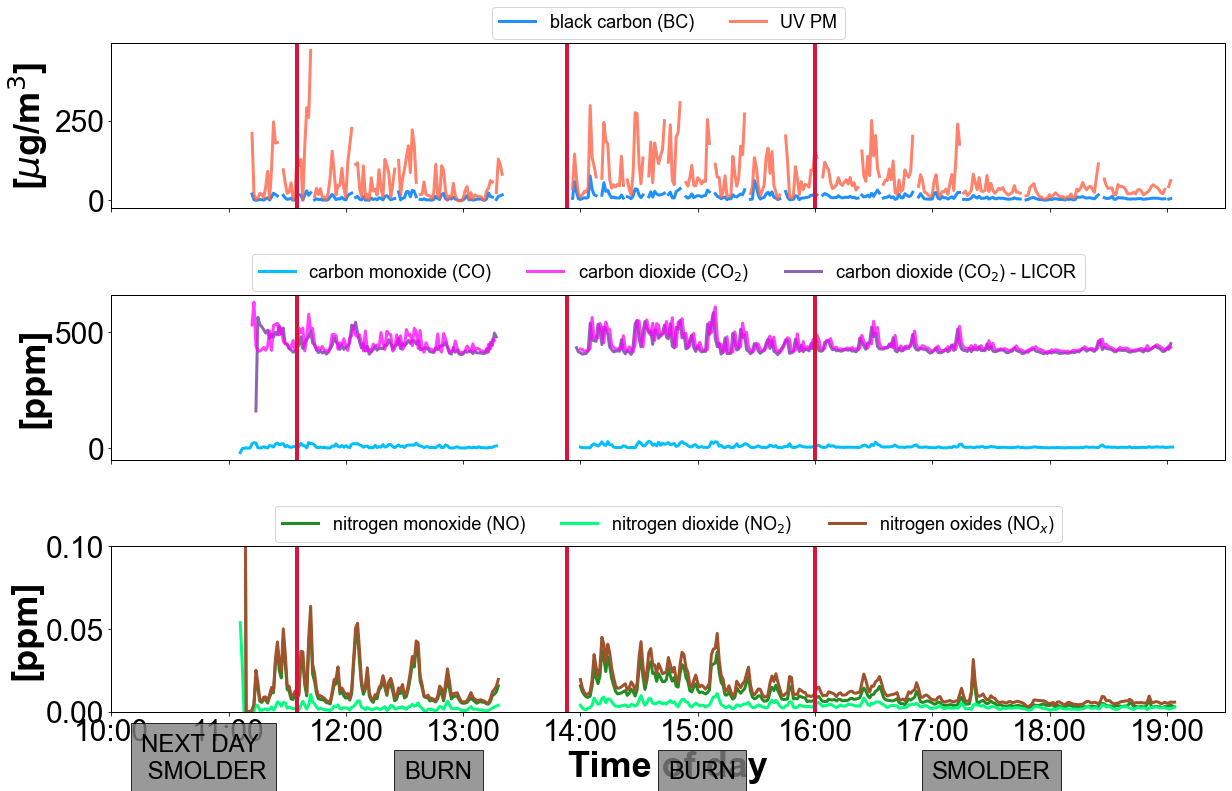

In [14]:
fig2, ax2 = plt.subplots(3,1,sharex=True)

ax2[0].plot(df2T.index,df2T.BC6/1000,label = 'black carbon (BC)',color='#1E90FF')
ax2[0].plot(df2T.index,df2T.BC1/1000,alpha = 0.8,label='UV PM',color = '#FF6347')
ax2[0].set_ylabel('[$\mu$g/m$^3$]',fontsize = 36)
ax2[0].axvline(d2b,linewidth=4,color = '#DC143C')
ax2[0].axvline(d2b2,linewidth=4,color = '#DC143C')
ax2[0].axvline(d2s,linewidth=4,color = '#DC143C')
ax2[0].legend(loc = 8,bbox_to_anchor = (0.5,.97),ncol=3,fontsize=18)

ax2[1].plot(df2CE.index,df2CE.CO_cal,label = 'carbon monoxide (CO)',color = '#00BFFF')
ax2[1].plot(df2CE.index,df2CE.CO2_cal,label = 'carbon dioxide (CO$_2$)',color = '#FF00FF',zorder = 2,alpha=0.75)
ax2[1].plot(df2lcT.index,df2lcT.CO2_licor,label = 'carbon dioxide (CO$_2$) - LICOR',color = '#663399',zorder=1,alpha=0.75)
ax2[1].legend(loc = 8,bbox_to_anchor = (0.5,.97),ncol=3,fontsize=18)
ax2[1].axvline(d2b,linewidth=4,color = '#DC143C')
ax2[1].axvline(d2b2,linewidth=4,color = '#DC143C')
ax2[1].axvline(d2s,linewidth=4,color = '#DC143C')
ax2[1].set_ylabel('[ppm]',fontsize = 36)

ax2[2].plot(df2CE.index,df2CE.NO_cal,color='#228B22',label = 'nitrogen monoxide (NO)')
ax2[2].plot(df2CE.index,df2CE.NO2_cal,color='#00FF7F',label = 'nitrogen dioxide (NO$_2$)')
ax2[2].plot(df2CE.index,df2CE.NOx_cal,color='#A0522D',label = 'nitrogen oxides (NO$_x$)')
ax2[2].set_xlabel('Time of day',fontsize = 36)
ax2[2].set_xlim(left = pd.to_datetime('2021-04-21 10:00'),right=pd.to_datetime('2021-04-21 19:30'))
ax2[2].set_ylim([0, 0.1])
ax2[2].xaxis.set_major_formatter(timeFormat)
ax2[2].axvline(d2b,linewidth=4,color = '#DC143C')
ax2[2].axvline(d2b2,linewidth=4,color = '#DC143C')
ax2[2].axvline(d2s,linewidth=4,color = '#DC143C')
ax2[2].text(pd.to_datetime('2021-04-21 10:15'), -0.04,'NEXT DAY\n SMOLDER',fontsize = 24,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax2[2].text(pd.to_datetime('2021-04-21 17:00'), -0.04,'SMOLDER',fontsize = 24,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax2[2].text(pd.to_datetime('2021-04-21 12:30'), -0.04,'BURN',fontsize = 24,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax2[2].text(pd.to_datetime('2021-04-21 14:45'), -0.04,'BURN',fontsize = 24,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax2[2].set_ylabel('[ppm]',fontsize = 36)
ax2[2].legend(loc = 8,bbox_to_anchor = (0.5,.97),ncol=3,fontsize=18)

plt.tight_layout()

## Day 3

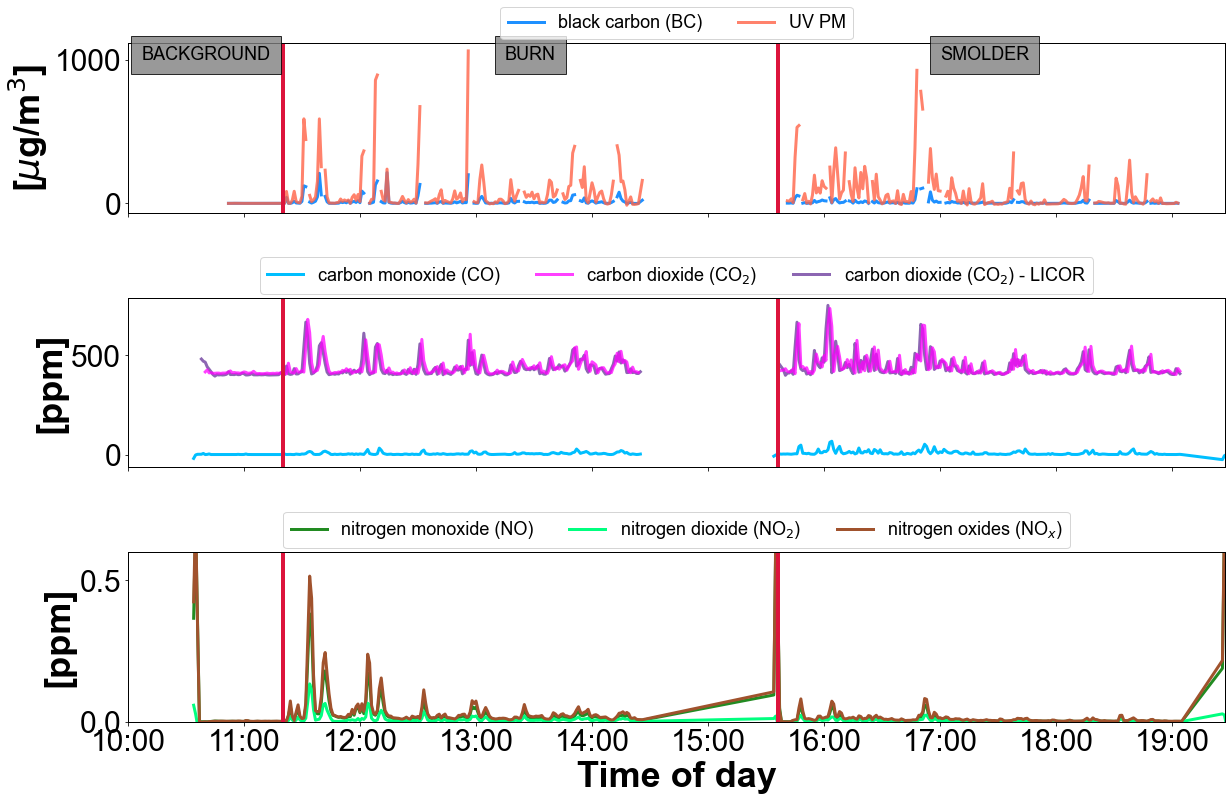

In [15]:
fig3, ax3 = plt.subplots(3,1,sharex=True)

ax3[0].plot(df3T.index,df3T.BC6/1000,label = 'black carbon (BC)',color='#1E90FF')
ax3[0].plot(df3T.index,df3T.BC1/1000,alpha = 0.8,label='UV PM',color = '#FF6347')
ax3[0].set_ylabel('[$\mu$g/m$^3$]',fontsize = 36)
ax3[0].axvline(d3b,linewidth=4,color = '#DC143C')
ax3[0].axvline(d3s,linewidth=4,color = '#DC143C')
ax3[0].set_xlim(left = pd.to_datetime('2021-04-22 10:00'))
ax3[0].text(pd.to_datetime('2021-04-22 17:00'), 1000,'SMOLDER',fontsize = 18,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax3[0].text(pd.to_datetime('2021-04-22 13:15'), 1000,'BURN',fontsize = 18,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax3[0].text(pd.to_datetime('2021-04-22 10:07'), 1000,'BACKGROUND',fontsize = 18,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax3[0].legend(loc = 8,bbox_to_anchor = (0.5,.97),ncol=3,fontsize=18)

ax3[1].plot(df3CE.index,df3CE.CO_cal,label = 'carbon monoxide (CO)',color = '#00BFFF')
ax3[1].plot(df3CE.index,df3CE.CO2_cal,label = 'carbon dioxide (CO$_2$)',color = '#FF00FF',zorder = 2,alpha=0.75)
ax3[1].plot(df3lcT.index,df3lcT.CO2_licor,label = 'carbon dioxide (CO$_2$) - LICOR',color = '#663399',zorder=1,alpha=0.75)
ax3[1].legend(loc = 8,bbox_to_anchor = (0.5,.97),ncol=3,fontsize=18)
ax3[1].axvline(d3b,linewidth=4,color = '#DC143C')
ax3[1].axvline(d3s,linewidth=4,color = '#DC143C')
ax3[1].set_ylabel('[ppm]',fontsize = 36)

ax3[2].plot(df3CE.index,df3CE.NO_cal,color='#228B22',label = 'nitrogen monoxide (NO)')
ax3[2].plot(df3CE.index,df3CE.NO2_cal,color='#00FF7F',label = 'nitrogen dioxide (NO$_2$)')
ax3[2].plot(df3CE.index,df3CE.NOx_cal,color='#A0522D',label = 'nitrogen oxides (NO$_x$)')
ax3[2].set_xlabel('Time of day',fontsize = 36)
ax3[2].axvline(d3b,linewidth=4,color = '#DC143C')
ax3[2].axvline(d3s,linewidth=4,color = '#DC143C')
ax3[2].xaxis.set_major_formatter(timeFormat)
ax3[2].legend(loc = 8,bbox_to_anchor = (0.5,.97),ncol=3,fontsize=18)
ax3[2].set_ylabel('[ppm]',fontsize = 36)
ax3[2].set_ylim([0, 0.6])

plt.tight_layout()

## Day 4

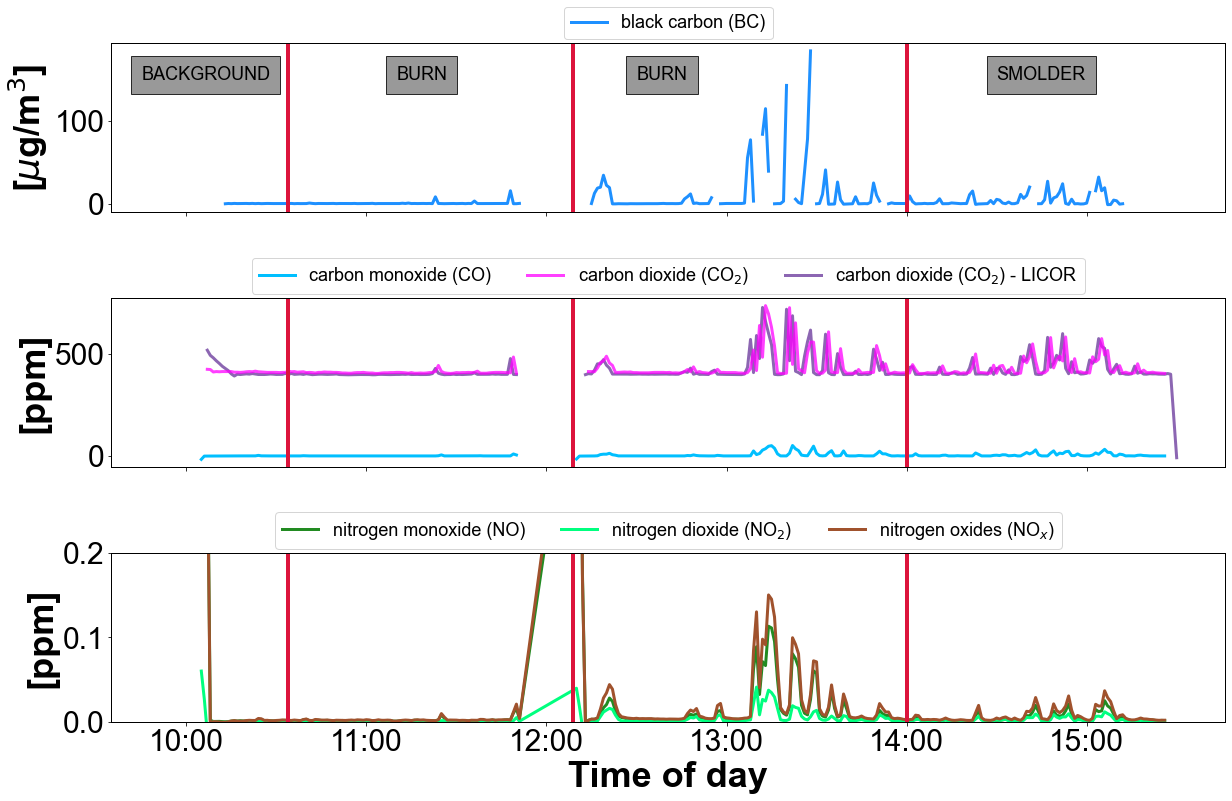

In [16]:
fig4, ax4 = plt.subplots(3,1,sharex=True)

ax4[0].plot(df4T.index,df4T.BC6/1000,label = 'black carbon (BC)',color='#1E90FF')
ax4[0].set_ylabel('[$\mu$g/m$^3$]',fontsize = 36)
ax4[0].axvline(d4b1,linewidth=4,color = '#DC143C')
ax4[0].axvline(d4b2,linewidth=4,color = '#DC143C')
ax4[0].axvline(d4s,linewidth=4,color = '#DC143C')
ax4[0].text(pd.to_datetime('2021-04-23 14:30'), 150,'SMOLDER',fontsize = 18,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax4[0].text(pd.to_datetime('2021-04-23 11:10'), 150,'BURN',fontsize = 18,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax4[0].text(pd.to_datetime('2021-04-23 12:30'), 150,'BURN',fontsize = 18,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax4[0].text(pd.to_datetime('2021-04-23 9:45'), 150,'BACKGROUND',fontsize = 18,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax4[0].legend(loc = 8,bbox_to_anchor = (0.5,.97),ncol=3,fontsize=18)

ax4[1].plot(df4CE.index,df4CE.CO_cal,label = 'carbon monoxide (CO)',color = '#00BFFF')
ax4[1].plot(df4CE.index,df4CE.CO2_cal,label = 'carbon dioxide (CO$_2$)',color = '#FF00FF',zorder = 2,alpha=0.75)
ax4[1].plot(df4lcT.index,df4lcT.CO2_licor,label = 'carbon dioxide (CO$_2$) - LICOR',color = '#663399',zorder=1,alpha=0.75)
ax4[1].axvline(d4b1,linewidth=4,color = '#DC143C')
ax4[1].axvline(d4b2,linewidth=4,color = '#DC143C')
ax4[1].axvline(d4s,linewidth=4,color = '#DC143C')
ax4[1].legend(loc = 8,bbox_to_anchor = (0.5,.97),ncol=3,fontsize=18)
ax4[1].set_ylabel('[ppm]',fontsize = 36)

ax4[2].plot(df4CE.index,df4CE.NO_cal,color='#228B22',label = 'nitrogen monoxide (NO)')
ax4[2].plot(df4CE.index,df4CE.NO2_cal,color='#00FF7F',label = 'nitrogen dioxide (NO$_2$)')
ax4[2].plot(df4CE.index,df4CE.NOx_cal,color='#A0522D',label = 'nitrogen oxides (NO$_x$)')
ax4[2].xaxis.set_major_formatter(timeFormat)
ax4[2].set_xlabel('Time of day',fontsize = 36)
ax4[2].set_xlim(left = pd.to_datetime('2021-04-23 9:35'))
ax4[2].axvline(d4b1,linewidth=4,color = '#DC143C')
ax4[2].axvline(d4b2,linewidth=4,color = '#DC143C')
ax4[2].axvline(d4s,linewidth=4,color = '#DC143C')
ax4[2].legend(loc = 8,bbox_to_anchor = (0.5,.97),ncol=3,fontsize=18)
ax4[2].set_ylim([0, 0.2])
ax4[2].set_ylabel('[ppm]',fontsize = 36)

plt.tight_layout()

# Calculate attenuation and AAE from the sensor voltages

In [17]:
# constants for the AE33
wl = [370, 470, 520, 590, 660, 880, 950] #nanometers on the AE33
sigma = [18.47, 14.54, 13.14, 11.58, 10.35, 7.77, 7.19] #mass absorption cross-section at wavelengths corresponding to wl [m2/g]

In [18]:
#attenuation (ATN) for each sensor and channel calculated for day 1 burn
df1['ATN11'] = -100*np.log(df1.Sen1Ch1/df1.RefCh1)
df1['ATN21'] = -100*np.log(df1.Sen2Ch1/df1.RefCh1)
df1['ATN12'] = -100*np.log(df1.Sen1Ch2/df1.RefCh2)
df1['ATN22'] = -100*np.log(df1.Sen2Ch2/df1.RefCh2)
df1['ATN13'] = -100*np.log(df1.Sen1Ch3/df1.RefCh3)
df1['ATN23'] = -100*np.log(df1.Sen2Ch3/df1.RefCh3)
df1['ATN14'] = -100*np.log(df1.Sen1Ch4/df1.RefCh4)
df1['ATN24'] = -100*np.log(df1.Sen2Ch4/df1.RefCh4)
df1['ATN15'] = -100*np.log(df1.Sen1Ch5/df1.RefCh5)
df1['ATN25'] = -100*np.log(df1.Sen2Ch5/df1.RefCh5)
df1['ATN16'] = -100*np.log(df1.Sen1Ch6/df1.RefCh6)
df1['ATN26'] = -100*np.log(df1.Sen2Ch6/df1.RefCh6)
df1['ATN17'] = -100*np.log(df1.Sen1Ch7/df1.RefCh7)
df1['ATN27'] = -100*np.log(df1.Sen2Ch7/df1.RefCh7)

#attenuation (ATN) for each sensor and channel calculated for day 2 burn
df2['ATN11'] = -100*np.log(df2.Sen1Ch1/df2.RefCh1)
df2['ATN21'] = -100*np.log(df2.Sen2Ch1/df2.RefCh1)
df2['ATN12'] = -100*np.log(df2.Sen1Ch2/df2.RefCh2)
df2['ATN22'] = -100*np.log(df2.Sen2Ch2/df2.RefCh2)
df2['ATN13'] = -100*np.log(df2.Sen1Ch3/df2.RefCh3)
df2['ATN23'] = -100*np.log(df2.Sen2Ch3/df2.RefCh3)
df2['ATN14'] = -100*np.log(df2.Sen1Ch4/df2.RefCh4)
df2['ATN24'] = -100*np.log(df2.Sen2Ch4/df2.RefCh4)
df2['ATN15'] = -100*np.log(df2.Sen1Ch5/df2.RefCh5)
df2['ATN25'] = -100*np.log(df2.Sen2Ch5/df2.RefCh5)
df2['ATN16'] = -100*np.log(df2.Sen1Ch6/df2.RefCh6)
df2['ATN26'] = -100*np.log(df2.Sen2Ch6/df2.RefCh6)
df2['ATN17'] = -100*np.log(df2.Sen1Ch7/df2.RefCh7)
df2['ATN27'] = -100*np.log(df2.Sen2Ch7/df2.RefCh7)

#attenuation (ATN) for each sensor and channel calculated for day 3 burn
df3['ATN11'] = -100*np.log(df3.Sen1Ch1/df3.RefCh1)
df3['ATN21'] = -100*np.log(df3.Sen2Ch1/df3.RefCh1)
df3['ATN12'] = -100*np.log(df3.Sen1Ch2/df3.RefCh2)
df3['ATN22'] = -100*np.log(df3.Sen2Ch2/df3.RefCh2)
df3['ATN13'] = -100*np.log(df3.Sen1Ch3/df3.RefCh3)
df3['ATN23'] = -100*np.log(df3.Sen2Ch3/df3.RefCh3)
df3['ATN14'] = -100*np.log(df3.Sen1Ch4/df3.RefCh4)
df3['ATN24'] = -100*np.log(df3.Sen2Ch4/df3.RefCh4)
df3['ATN15'] = -100*np.log(df3.Sen1Ch5/df3.RefCh5)
df3['ATN25'] = -100*np.log(df3.Sen2Ch5/df3.RefCh5)
df3['ATN16'] = -100*np.log(df3.Sen1Ch6/df3.RefCh6)
df3['ATN26'] = -100*np.log(df3.Sen2Ch6/df3.RefCh6)
df3['ATN17'] = -100*np.log(df3.Sen1Ch7/df3.RefCh7)
df3['ATN27'] = -100*np.log(df3.Sen2Ch7/df3.RefCh7)

#attenuation (ATN) for each sensor and channel calculated for day 4 burn
df4['ATN11'] = -100*np.log(df4.Sen1Ch1/df4.RefCh1)
df4['ATN21'] = -100*np.log(df4.Sen2Ch1/df4.RefCh1)
df4['ATN12'] = -100*np.log(df4.Sen1Ch2/df4.RefCh2)
df4['ATN22'] = -100*np.log(df4.Sen2Ch2/df4.RefCh2)
df4['ATN13'] = -100*np.log(df4.Sen1Ch3/df4.RefCh3)
df4['ATN23'] = -100*np.log(df4.Sen2Ch3/df4.RefCh3)
df4['ATN14'] = -100*np.log(df4.Sen1Ch4/df4.RefCh4)
df4['ATN24'] = -100*np.log(df4.Sen2Ch4/df4.RefCh4)
df4['ATN15'] = -100*np.log(df4.Sen1Ch5/df4.RefCh5)
df4['ATN25'] = -100*np.log(df4.Sen2Ch5/df4.RefCh5)
df4['ATN16'] = -100*np.log(df4.Sen1Ch6/df4.RefCh6)
df4['ATN26'] = -100*np.log(df4.Sen2Ch6/df4.RefCh6)
df4['ATN17'] = -100*np.log(df4.Sen1Ch7/df4.RefCh7)
df4['ATN27'] = -100*np.log(df4.Sen2Ch7/df4.RefCh7)
None

/Users/jdabutler/opt/anaconda3/envs/blodgett/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jdabutler/opt/anaconda3/envs/blodgett/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jdabutler/opt/anaconda3/envs/blodgett/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jdabutler/opt/anaconda3/envs/blodgett/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jdabutler/opt/anaconda3/envs/blodgett/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufun

In [19]:
# 1-minute attenuation dataframes
dfATN1 = df1[['ATN11','ATN12','ATN13','ATN14','ATN15','ATN16','ATN17']].resample(timebase).asfreq()
dfATN2 = df2[['ATN11','ATN12','ATN13','ATN14','ATN15','ATN16','ATN17']].resample(timebase).asfreq()
dfATN3 = df3[['ATN11','ATN12','ATN13','ATN14','ATN15','ATN16','ATN17']].resample(timebase).asfreq()
dfATN4 = df4[['ATN11','ATN12','ATN13','ATN14','ATN15','ATN16','ATN17']].resample(timebase).asfreq()

# calculate difference in minutely attenuation
dfATN1[['dATN11','dATN12','dATN13','dATN14','dATN15','dATN16','dATN17']] = dfATN1.loc[:,['ATN11','ATN12','ATN13','ATN14','ATN15','ATN16','ATN17']].diff()
dfATN1[['dATN11','dATN12','dATN13','dATN14','dATN15','dATN16','dATN17']] = np.log(dfATN1[['dATN11','dATN12','dATN13','dATN14','dATN15','dATN16','dATN17']])

dfATN2[['dATN11','dATN12','dATN13','dATN14','dATN15','dATN16','dATN17']] = dfATN2.loc[:,['ATN11','ATN12','ATN13','ATN14','ATN15','ATN16','ATN17']].diff()
dfATN2[['dATN11','dATN12','dATN13','dATN14','dATN15','dATN16','dATN17']] = np.log(dfATN2[['dATN11','dATN12','dATN13','dATN14','dATN15','dATN16','dATN17']])

dfATN3[['dATN11','dATN12','dATN13','dATN14','dATN15','dATN16','dATN17']] = dfATN3.loc[:,['ATN11','ATN12','ATN13','ATN14','ATN15','ATN16','ATN17']].diff()
dfATN3[['dATN11','dATN12','dATN13','dATN14','dATN15','dATN16','dATN17']] = np.log(dfATN3[['dATN11','dATN12','dATN13','dATN14','dATN15','dATN16','dATN17']])

dfATN4[['dATN11','dATN12','dATN13','dATN14','dATN15','dATN16','dATN17']] = dfATN4.loc[:,['ATN11','ATN12','ATN13','ATN14','ATN15','ATN16','ATN17']].diff()
dfATN4[['dATN11','dATN12','dATN13','dATN14','dATN15','dATN16','dATN17']] = np.log(dfATN4[['dATN11','dATN12','dATN13','dATN14','dATN15','dATN16','dATN17']])

# drop NaN values
dfATN1 = dfATN1.dropna()
dfATN2 = dfATN2.dropna()
dfATN3 = dfATN3.dropna()
dfATN4 = dfATN4.dropna()

/Users/jdabutler/opt/anaconda3/envs/blodgett/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/jdabutler/opt/anaconda3/envs/blodgett/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/Users/jdabutler/opt/anaconda3/envs/blodgett/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/Users/jdabutler/opt/anaconda3/envs/blodgett/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/jdabutler/opt/anaconda3/envs/blodgett/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/Users/j

In [20]:
# Calculate linear fit of attenuation data to afford AAE
dfATN1['fit'] = dfATN1[['dATN11','dATN12','dATN13','dATN14','dATN15','dATN16','dATN17']].apply(lambda x: np.polyfit(np.log(wl),x,1),axis = 1)
dfATN2['fit'] = dfATN2[['dATN11','dATN12','dATN13','dATN14','dATN15','dATN16','dATN17']].apply(lambda x: np.polyfit(np.log(wl),x,1),axis = 1)
dfATN3['fit'] = dfATN3[['dATN11','dATN12','dATN13','dATN14','dATN15','dATN16','dATN17']].apply(lambda x: np.polyfit(np.log(wl),x,1),axis = 1)
dfATN4['fit'] = dfATN4[['dATN11','dATN12','dATN13','dATN14','dATN15','dATN16','dATN17']].apply(lambda x: np.polyfit(np.log(wl),x,1),axis = 1)

dfATN1[['slope','intercept']] = dfATN1.fit.apply(pd.Series)
dfATN1 = dfATN1.drop(columns = 'fit')

dfATN2[['slope','intercept']] = dfATN2.fit.apply(pd.Series)
dfATN2 = dfATN2.drop(columns = 'fit')

dfATN3[['slope','intercept']] = dfATN3.fit.apply(pd.Series)
dfATN3 = dfATN3.drop(columns = 'fit')

dfATN4[['slope','intercept']] = dfATN4.fit.apply(pd.Series)
dfATN4 = dfATN4.drop(columns = 'fit')

dfATN1['AAE'] = -dfATN1['slope']
dfATN2['AAE'] = -dfATN2['slope']
dfATN3['AAE'] = -dfATN3['slope']
dfATN4['AAE'] = -dfATN4['slope']

## Daily Timeseries

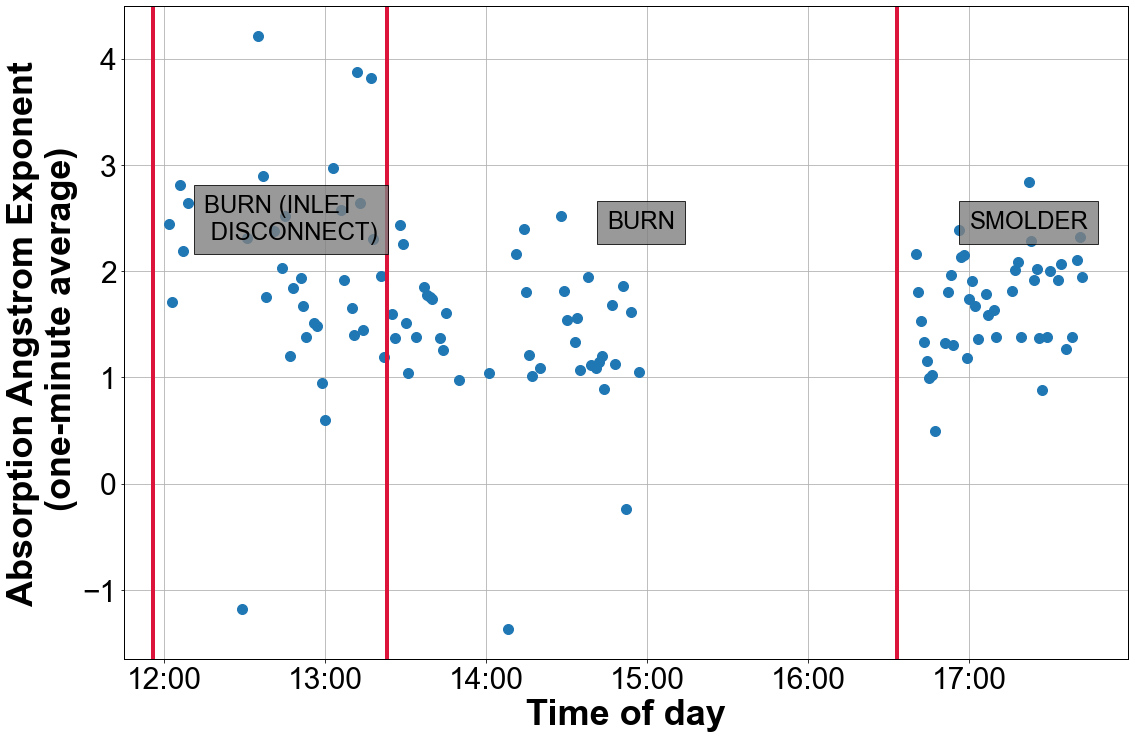

In [21]:
# Day 1
fig6, ax6 = plt.subplots()
plt.plot(dfATN1.index,dfATN1.AAE,'o')
ax6.set_xlabel('Time of day',fontsize = 36)
ax6.xaxis.set_major_formatter(timeFormat)
ax6.axvline(d1be,linewidth=4,color = '#DC143C')
ax6.axvline(d1b,linewidth=4,color = '#DC143C')
ax6.axvline(d1s,linewidth=4,color = '#DC143C')
ax6.text(pd.to_datetime('2021-04-20 12:15'), 2.3,'BURN (INLET \n DISCONNECT)',fontsize = 24,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax6.text(pd.to_datetime('2021-04-20 14:45'), 2.4,'BURN',fontsize = 24,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax6.text(pd.to_datetime('2021-04-20 17:00'), 2.4,'SMOLDER',fontsize = 24,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax6.set_ylabel('Absorption Angstrom Exponent\n (one-minute average)',fontsize = 36)
plt.grid(True)

Text(0, 0.5, 'Absorption Angstrom Exponent\n (one-minute average)')

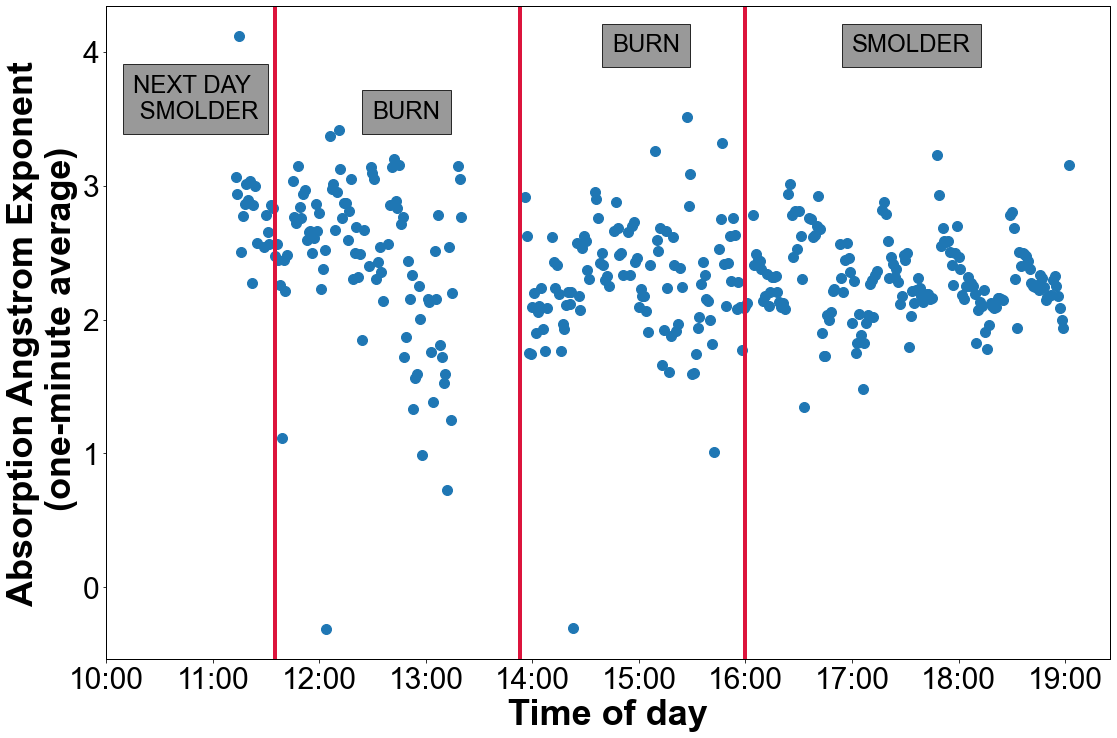

In [22]:
# Day 2
fig5, ax5 = plt.subplots()

ax5.plot(dfATN2.index,dfATN2.AAE,'o')
ax5.set_xlabel('Time of day',fontsize = 36)
ax5.xaxis.set_major_formatter(timeFormat)
ax5.axvline(d2b,linewidth=4,color = '#DC143C')
ax5.axvline(d2b2,linewidth=4,color = '#DC143C')
ax5.axvline(d2s,linewidth=4,color = '#DC143C')
ax5.text(pd.to_datetime('2021-04-21 10:15'), 3.5,'NEXT DAY\n SMOLDER',fontsize = 24,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax5.text(pd.to_datetime('2021-04-21 17:00'), 4,'SMOLDER',fontsize = 24,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax5.text(pd.to_datetime('2021-04-21 12:30'), 3.5,'BURN',fontsize = 24,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax5.text(pd.to_datetime('2021-04-21 14:45'), 4,'BURN',fontsize = 24,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax5.set_xlim(left = pd.to_datetime('2021-04-21 10:00'))
ax5.set_ylabel('Absorption Angstrom Exponent\n (one-minute average)',fontsize = 36)

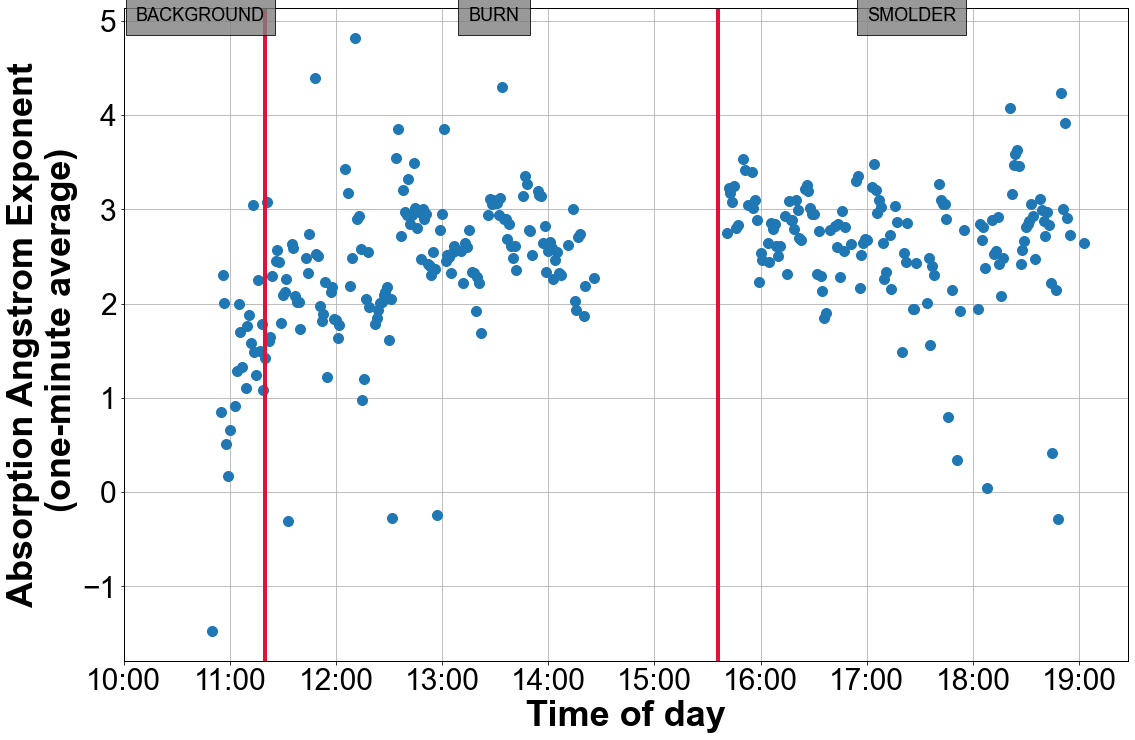

In [23]:
# Day 3
fig3a, ax3a = plt.subplots()
plt.plot(dfATN3.index,dfATN3.AAE,'o')
ax3a.set_xlabel('Time of day',fontsize = 36)
ax3a.xaxis.set_major_formatter(timeFormat)
ax3a.axvline(d3b,linewidth=4,color = '#DC143C')
ax3a.axvline(d3s,linewidth=4,color = '#DC143C')
ax3a.set_xlim(left = pd.to_datetime('2021-04-22 10:00'))
ax3a.text(pd.to_datetime('2021-04-22 17:00'), 5,'SMOLDER',fontsize = 18,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax3a.text(pd.to_datetime('2021-04-22 13:15'), 5,'BURN',fontsize = 18,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax3a.text(pd.to_datetime('2021-04-22 10:07'), 5,'BACKGROUND',fontsize = 18,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax3a.set_ylabel('Absorption Angstrom Exponent\n (one-minute average)',fontsize = 36)
plt.grid(True)

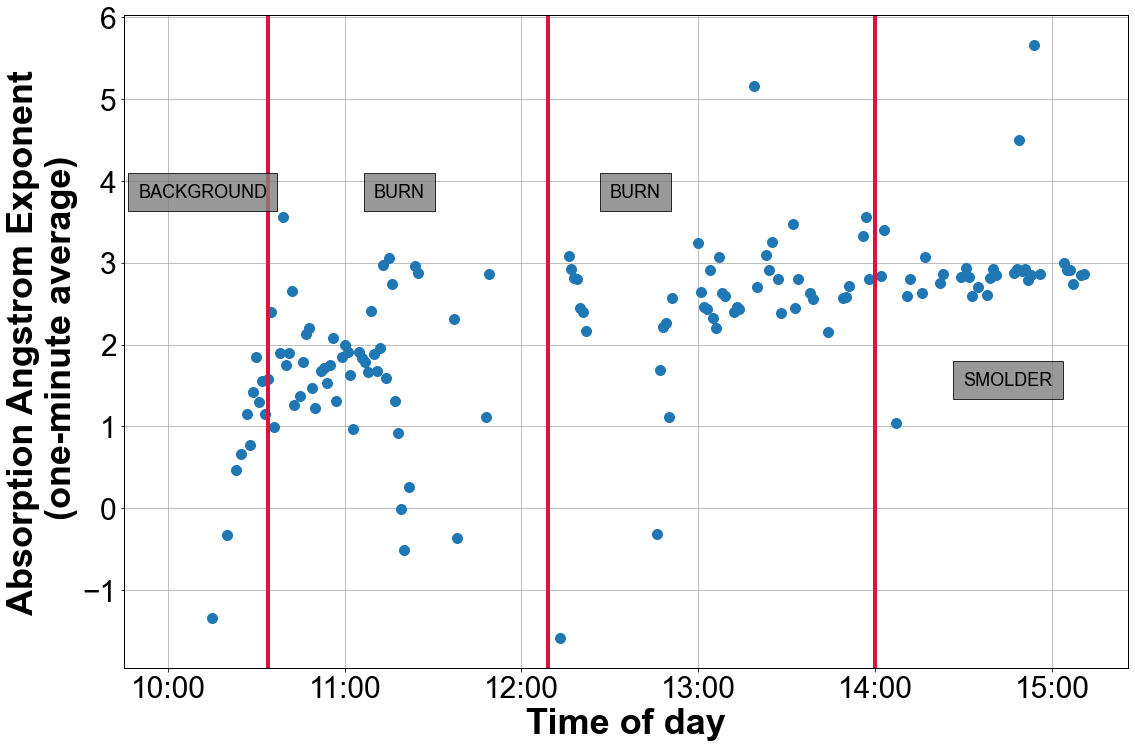

In [24]:
# Day 4
fig4a, ax4a = plt.subplots()
plt.plot(dfATN4.index,dfATN4.AAE,'o')
ax4a.set_xlabel('Time of day',fontsize = 36)
ax4a.xaxis.set_major_formatter(timeFormat)
ax4a.axvline(d4b1,linewidth=4,color = '#DC143C')
ax4a.axvline(d4b2,linewidth=4,color = '#DC143C')
ax4a.axvline(d4s,linewidth=4,color = '#DC143C')
ax4a.text(pd.to_datetime('2021-04-23 14:30'), 1.5,'SMOLDER',fontsize = 18,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax4a.text(pd.to_datetime('2021-04-23 11:10'), 3.8,'BURN',fontsize = 18,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax4a.text(pd.to_datetime('2021-04-23 12:30'), 3.8,'BURN',fontsize = 18,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax4a.set_xlim(left = pd.to_datetime('2021-04-23 9:45'))
ax4a.text(pd.to_datetime('2021-04-23 9:50'), 3.8,'BACKGROUND',fontsize = 18,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax4a.set_ylabel('Absorption Angstrom Exponent\n (one-minute average)',fontsize = 36)
plt.grid(True)

# ABCD versus AE33

## Daily Timeseries

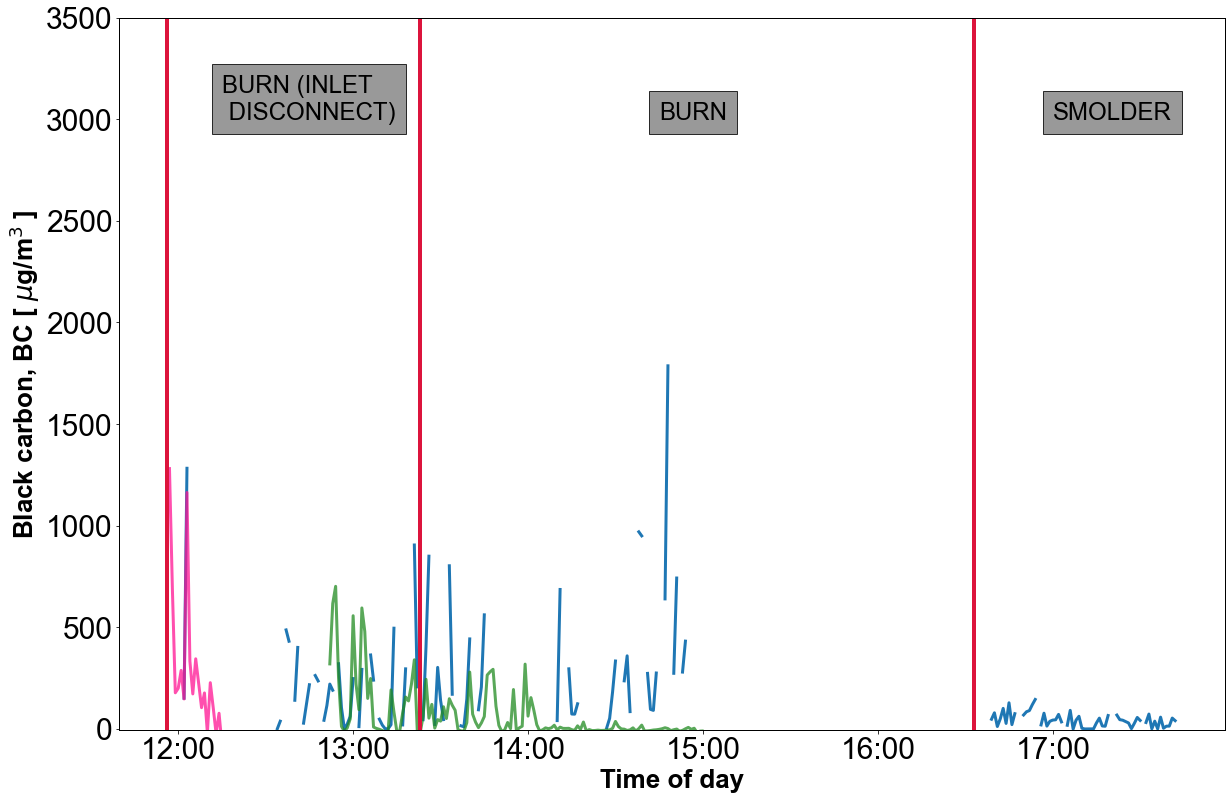

In [25]:
# Day 1
dfp = df138T[d1be:d1cs]
dfp2 = df52T[d1cs:d1co]

fig7, ax7 = plt.subplots()
plt.plot(df1T.index,df1T.BC6/1000)
plt.plot(dfp.index,dfp.BC,color='#FF1493',alpha = 0.75)
plt.plot(dfp2.index,dfp2.BC,color ='#228B22', alpha = 0.75)
ax7.set_ylim([-5,3500])
ax7.set_ylabel('Black carbon, BC [ $\mu$g/m$^3$ ]',fontsize = 26)
ax7.set_xlabel('Time of day',fontsize = 26)
ax7.xaxis.set_major_formatter(timeFormat)

#burn/smolder sections
ax7.axvline(d1be,linewidth=4,color = '#DC143C')
ax7.axvline(d1b,linewidth=4,color = '#DC143C')
ax7.axvline(d1s,linewidth=4,color = '#DC143C')
ax7.text(pd.to_datetime('2021-04-20 12:15'), 3000,'BURN (INLET \n DISCONNECT)',fontsize = 24,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax7.text(pd.to_datetime('2021-04-20 14:45'), 3000,'BURN',fontsize = 24,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax7.text(pd.to_datetime('2021-04-20 17:00'), 3000,'SMOLDER',fontsize = 24,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})

plt.tight_layout()

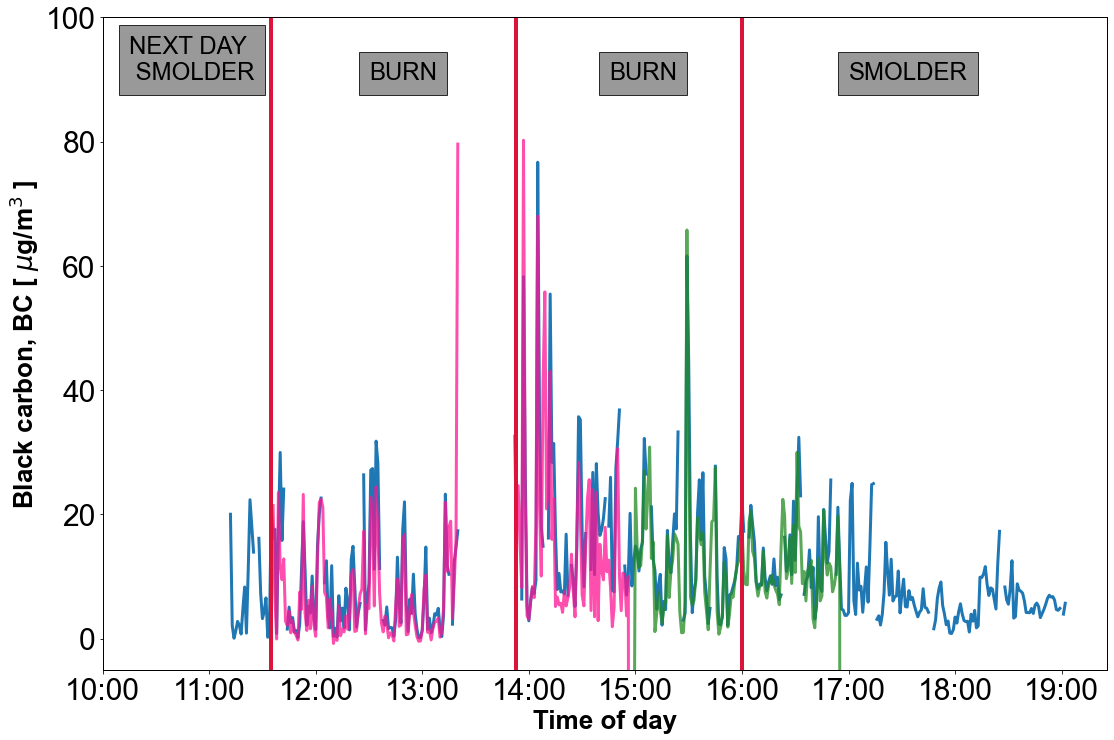

<Figure size 1296x864 with 0 Axes>

In [26]:
# Day 2
dfplot = df133T[d2b:d2cs]
dfplot2 = df138T[d2cs:d2e]

fig6, ax6 = plt.subplots()
plt.plot(df2T.index,df2T.BC6/1000)
plt.plot(dfplot.index,dfplot.BC,color='#FF1493',alpha = 0.75)
plt.plot(dfplot2.index,dfplot2.BC,color ='#228B22', alpha = 0.75)
ax6.set_ylim([-5,100])
ax6.set_ylabel('Black carbon, BC [ $\mu$g/m$^3$ ]',fontsize = 26)
ax6.set_xlabel('Time of day',fontsize = 26)
ax6.xaxis.set_major_formatter(timeFormat)

#burn/smolder sections
ax6.axvline(d2b,linewidth=4,color = '#DC143C')
ax6.axvline(d2b2,linewidth=4,color = '#DC143C')
ax6.axvline(d2s,linewidth=4,color = '#DC143C')
ax6.text(pd.to_datetime('2021-04-21 10:15'), 90,'NEXT DAY\n SMOLDER',fontsize = 24,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax6.text(pd.to_datetime('2021-04-21 17:00'), 90,'SMOLDER',fontsize = 24,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax6.text(pd.to_datetime('2021-04-21 12:30'), 90,'BURN',fontsize = 24,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax6.text(pd.to_datetime('2021-04-21 14:45'), 90,'BURN',fontsize = 24,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax6.set_xlim(left = pd.to_datetime('2021-04-21 10:00'))

plt.show()
plt.tight_layout()

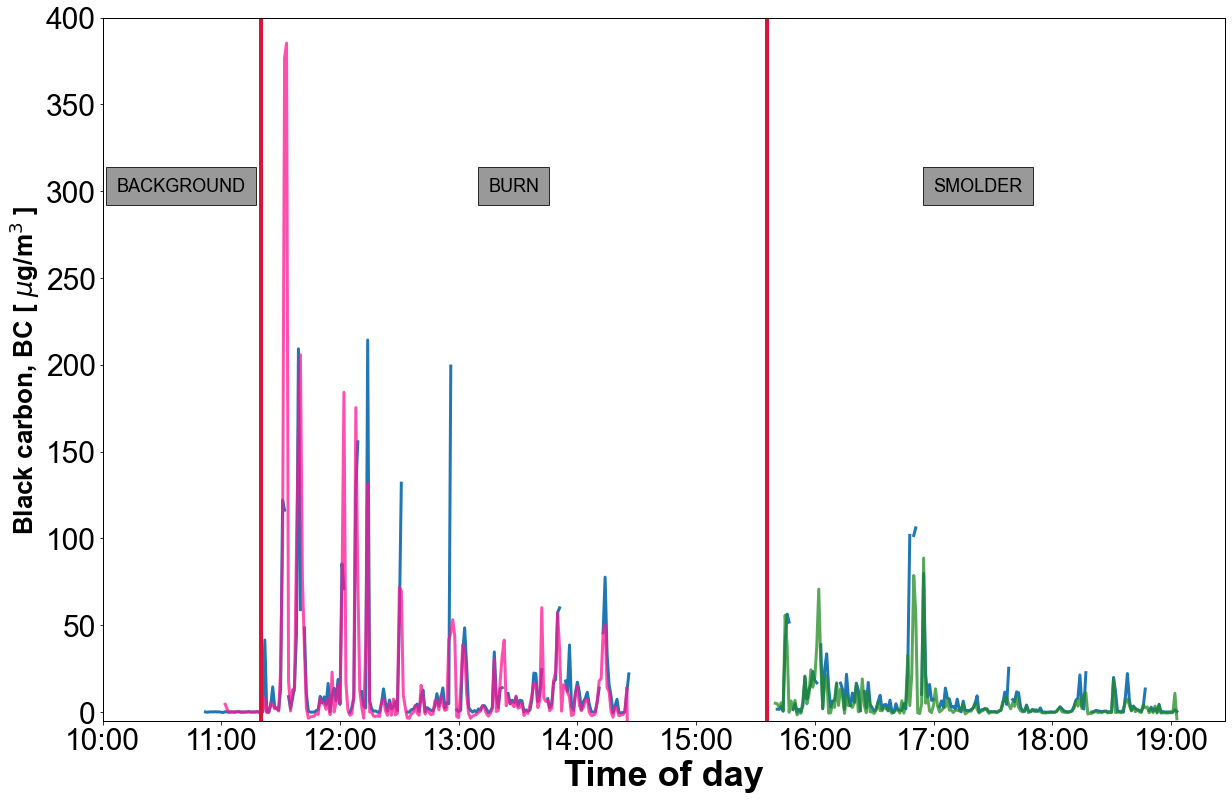

In [27]:
# Day 3
dfp = df138T[d3c:d3s]
dfp2 = df133T[d3s:d3e]

fig8, ax8 = plt.subplots()
plt.plot(df3T.index,df3T.BC6/1000)
plt.plot(dfp.index,dfp.BC,color='#FF1493',alpha = 0.75)
plt.plot(dfp2.index,dfp2.BC,color ='#228B22', alpha = 0.75)
ax8.set_ylim([-5,400])
ax8.set_ylabel('Black carbon, BC [ $\mu$g/m$^3$ ]',fontsize = 26)
ax8.set_xlabel('Time of day',fontsize = 26)
ax8.xaxis.set_major_formatter(timeFormat)

#burn/smolder sections
ax8.set_xlabel('Time of day',fontsize = 36)
ax8.axvline(d3b,linewidth=4,color = '#DC143C')
ax8.axvline(d3s,linewidth=4,color = '#DC143C')
ax8.set_xlim(left = pd.to_datetime('2021-04-22 10:00'))
ax8.text(pd.to_datetime('2021-04-22 17:00'), 300,'SMOLDER',fontsize = 18,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax8.text(pd.to_datetime('2021-04-22 13:15'), 300,'BURN',fontsize = 18,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax8.text(pd.to_datetime('2021-04-22 10:07'), 300,'BACKGROUND',fontsize = 18,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})

plt.tight_layout()

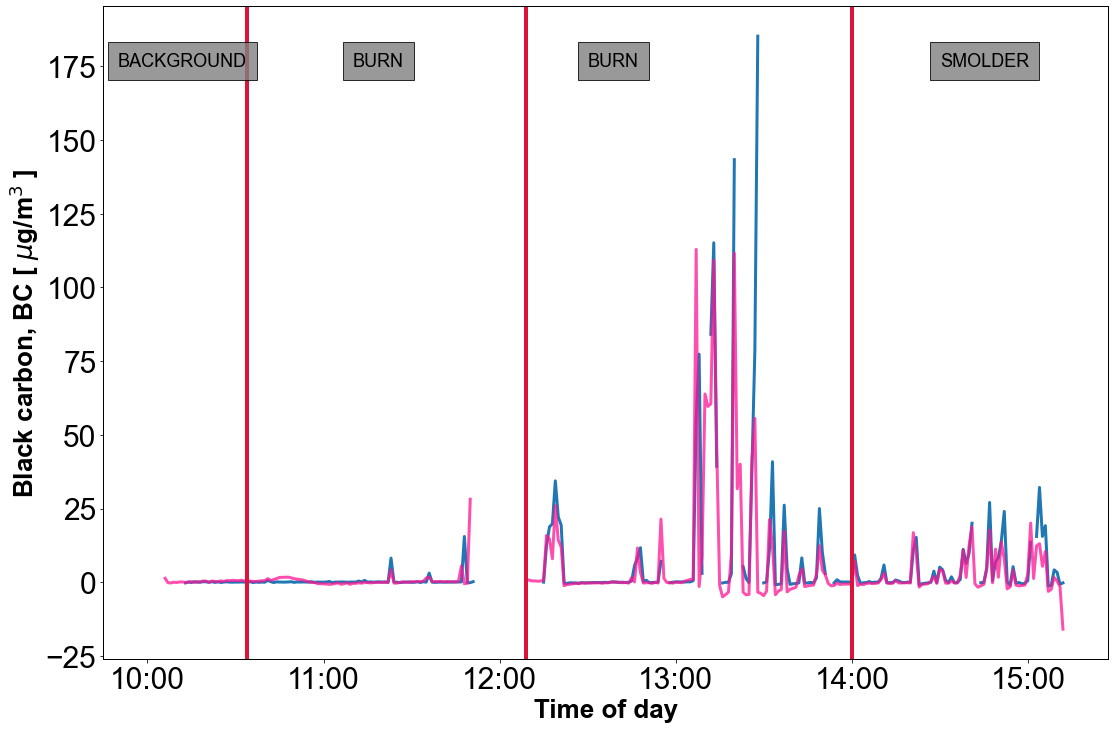

<Figure size 1296x864 with 0 Axes>

In [29]:
# Day 4
dfp = df133T[d4c:d4e]

fig9,ax9 = plt.subplots()
plt.plot(df4T.index,df4T.BC6/1000)
plt.plot(dfp.index,dfp.BC,color='#FF1493',alpha = 0.75)
ax9.set_ylabel('Black carbon, BC [ $\mu$g/m$^3$ ]',fontsize = 26)
ax9.set_xlabel('Time of day',fontsize = 26)
ax9.xaxis.set_major_formatter(timeFormat)

#burn/smolder sections
ax9.xaxis.set_major_formatter(timeFormat)
ax9.axvline(d4b1,linewidth=4,color = '#DC143C')
ax9.axvline(d4b2,linewidth=4,color = '#DC143C')
ax9.axvline(d4s,linewidth=4,color = '#DC143C')
ax9.text(pd.to_datetime('2021-04-23 14:30'), 175,'SMOLDER',fontsize = 18,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax9.text(pd.to_datetime('2021-04-23 11:10'), 175,'BURN',fontsize = 18,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax9.text(pd.to_datetime('2021-04-23 12:30'), 175,'BURN',fontsize = 18,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})
ax9.set_xlim(left = pd.to_datetime('2021-04-23 9:45'))
ax9.text(pd.to_datetime('2021-04-23 9:50'), 175,'BACKGROUND',fontsize = 18,bbox={'facecolor': 'grey', 'alpha': 0.8, 'pad': 10})

plt.show()
plt.tight_layout()
#fig9.savefig('ABCD_AE33_day4.png')

## Create unaligned AE33 and ABCD full datasets; linear regression datasets

In [57]:
dfABCD

,refVolt,sigVolt,ATN,BC,RH,temp,FR,Vbatt
time,,,,,,,,
2021-04-20 08:48:00,1.636075,0.635729,-0.583999,4.962078,48.705882,11.681088,110.764706,12.298039
2021-04-20 08:49:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-20 08:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-20 08:51:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-20 08:52:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-04-23 15:08:00,1.897782,1.531318,32.162432,-2.395550,20.793333,29.067972,109.300000,11.883333
2021-04-23 15:09:00,1.898383,1.531959,32.149661,1.616267,20.883333,29.017737,109.216667,11.848333
2021-04-23 15:10:00,1.899000,1.532010,32.176057,0.467100,20.685000,28.966905,109.350000,11.900000


In [59]:
dfABCD = df133.append(df138).append(df52).sort_index()
#dfABCD = pd.concat([df133,df138,df52],axis=1)
#dfAE33T = pd.concat([df1T,df2T,df3T,df4T],axis=1)
dfAE33T = df1T.append(df2T).append(df3T).append(df4T).sort_index()

dfAE33T['BC_AE33'] = dfAE33T.BC6/1000 # convert BC at 880 nm to ug/m3
dfABCD = dfABCD.resample('1T').mean() # calculate 1-minute average ABCD data

# Merge AE33 and ABCD 1-minute dataframes
dfC = pd.merge(dfAE33T,dfABCD,how='outer',left_index = True,right_index = True,indicator = True)

/var/folders/ft/cvp8z_vj1m9gr24vdrsn17rw0000gn/T/ipykernel_3345/3430004458.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfABCD = df133.append(df138).append(df52).sort_index()
/var/folders/ft/cvp8z_vj1m9gr24vdrsn17rw0000gn/T/ipykernel_3345/3430004458.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfABCD = df133.append(df138).append(df52).sort_index()
/var/folders/ft/cvp8z_vj1m9gr24vdrsn17rw0000gn/T/ipykernel_3345/3430004458.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAE33T = df1T.append(df2T).append(df3T).append(df4T).sort_index()
/var/folders/ft/cvp8z_vj1m9gr24vdrsn17rw0000gn/T/ipykernel_3345/3430004458.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futu

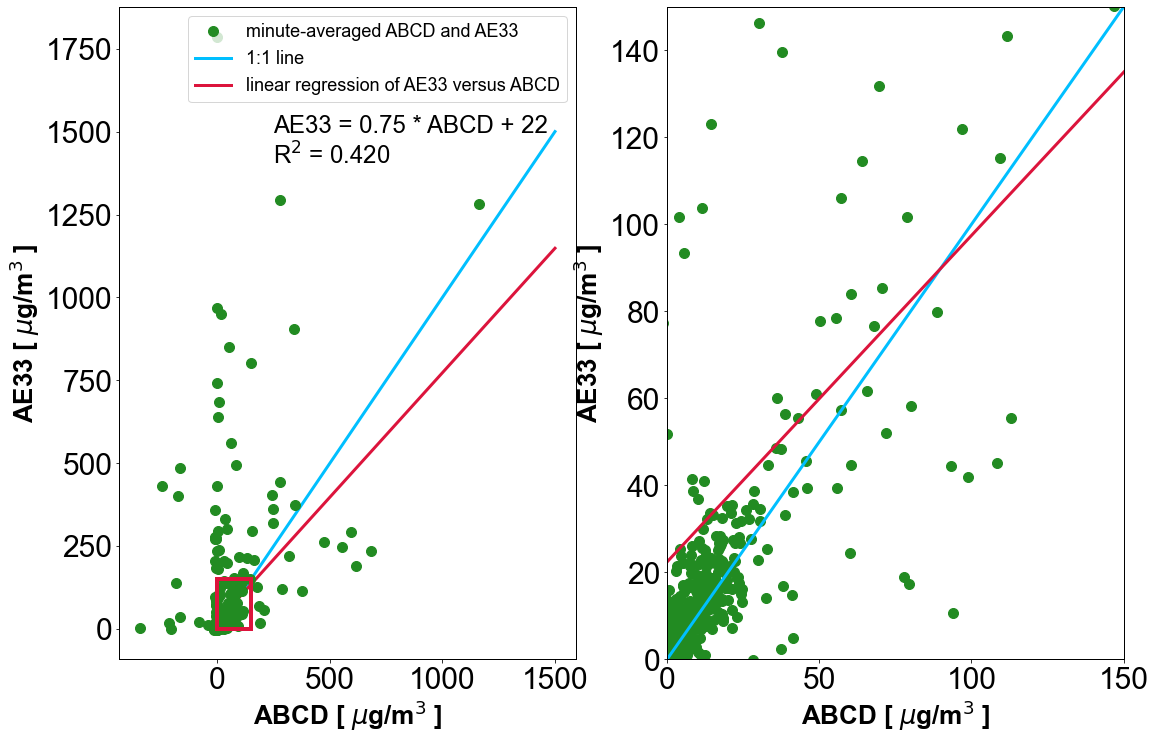

In [31]:
# calculate linear regression between AE33 and ABCD
mask = ~np.isnan(dfC.BC) & ~np.isnan(dfC.BC_AE33)
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(dfC.BC[mask],dfC.BC_AE33[mask])
x = np.linspace(0,1500,11)

from matplotlib.patches import Rectangle

figC, axC = plt.subplots(1,2)

bound = 150

axC[0].add_patch(Rectangle((0, 0), bound, bound, edgecolor = '#DC143C', facecolor = 'none', fill=True,lw=4,zorder = 10))
axC[0].plot(dfC.BC,dfC.BC_AE33,'o',color = '#228B22',zorder = 5,label = 'minute-averaged ABCD and AE33')
axC[0].plot([0,1500],[0,1500],color = '#00BFFF',zorder = 0, label = '1:1 line')
axC[0].plot(x,intercept + slope*x, color ='#DC143C',label = 'linear regression of AE33 versus ABCD')
axC[0].text(250,1400,r'AE33 =' + ' {:.2f}'.format(slope) + ' * ABCD + ' + '{:.0f}'.format(intercept) + '\nR$^2$ = ' + '{:.3f}'.format(r_value), fontsize = 24)
axC[0].set_ylabel('AE33 [ $\mu$g/m$^3$ ]',fontsize = 26)
axC[0].set_xlabel('ABCD [ $\mu$g/m$^3$ ]',fontsize = 26)
axC[0].legend(fontsize = 18,loc ='best')

axC[1].plot(dfC.BC,dfC.BC_AE33,'o',color = '#228B22')
axC[1].plot([0,1500],[0,1500],color = '#00BFFF')
axC[1].plot(x,intercept + slope*x, color ='#DC143C')
axC[1].set_ylabel('AE33 [ $\mu$g/m$^3$ ]',fontsize = 26)
axC[1].set_xlabel('ABCD [ $\mu$g/m$^3$ ]',fontsize = 26)
axC[1].set_xlim([0,bound])
axC[1].set_ylim([0,bound])

fig.tight_layout()

# Combustion efficiency vs. Absorption Angstrom Exponent

In [46]:
# Merge daily dataframes of attenuation and modified combustion efficiency
dfATN = dfATN1.append(dfATN2).append(dfATN3).append(dfATN4).sort_index()
dfCE = df1CE.append(df2CE).append(df3CE).append(df4CE).sort_index()
dfCE = dfCE.loc[pd.notnull(dfCE.index)]

df = pd.merge(dfCE[['CE']],dfATN[['AAE']],left_index=True,right_index=True)

/var/folders/ft/cvp8z_vj1m9gr24vdrsn17rw0000gn/T/ipykernel_3345/2018787165.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfATN = dfATN1.append(dfATN2).append(dfATN3).append(dfATN4).sort_index()
/var/folders/ft/cvp8z_vj1m9gr24vdrsn17rw0000gn/T/ipykernel_3345/2018787165.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfATN = dfATN1.append(dfATN2).append(dfATN3).append(dfATN4).sort_index()
/var/folders/ft/cvp8z_vj1m9gr24vdrsn17rw0000gn/T/ipykernel_3345/2018787165.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfATN = dfATN1.append(dfATN2).append(dfATN3).append(dfATN4).sort_index()
/var/folders/ft/cvp8z_vj1m9gr24vdrsn17rw0000gn/T/ipykernel_3345/2018787165.py:3: FutureWarning: The frame.append method is deprecated

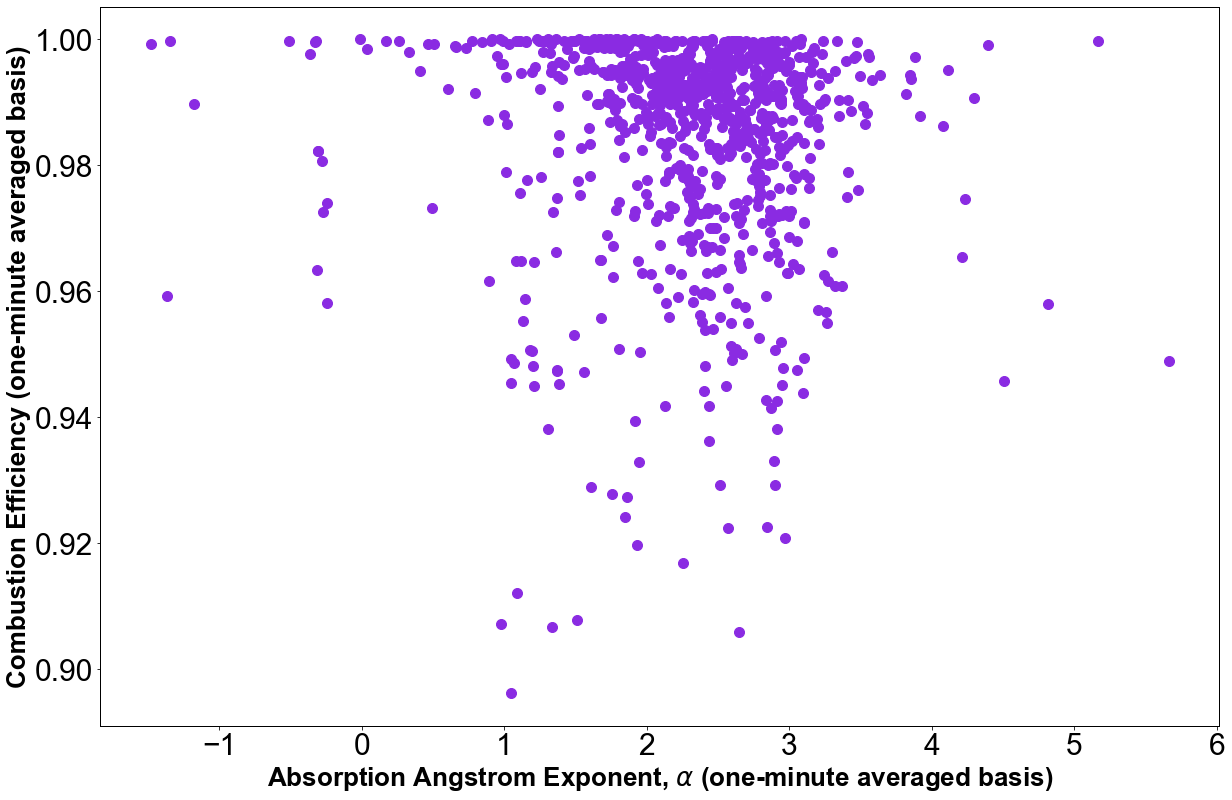

In [48]:
figCE, axCE = plt.subplots()

axCE.plot(df.AAE,df.CE,'o',color = '#8A2BE2',zorder = 5,label = 'minute-averaged AAE and combustion efficiency')
axCE.set_ylabel('Combustion Efficiency (one-minute averaged basis)',fontsize = 26)
axCE.set_xlabel(r'Absorption Angstrom Exponent, $\alpha$ (one-minute averaged basis)',fontsize = 26)

plt.tight_layout()

# Spot Samples (filter tape advancements)

In [49]:
wl2 = [370,370,470,470,520,520,590,590,660,660,880,880,950,950]
logWL = np.log(wl)

#combine all four days of measurements 
dfA = df1[['ATN11','ATN21', 'ATN12', 'ATN22', 'ATN13', 'ATN23', 'ATN14', 'ATN24', 'ATN15','ATN25', 'ATN16', 'ATN26', 'ATN17', 'ATN27','Status']].append(
      df2[['ATN11','ATN21', 'ATN12', 'ATN22', 'ATN13', 'ATN23', 'ATN14', 'ATN24', 'ATN15','ATN25', 'ATN16', 'ATN26', 'ATN17', 'ATN27','Status']]).append(
      df3[['ATN11','ATN21', 'ATN12', 'ATN22', 'ATN13', 'ATN23', 'ATN14', 'ATN24', 'ATN15','ATN25', 'ATN16', 'ATN26', 'ATN17', 'ATN27','Status']]).append(
      df4[['ATN11','ATN21', 'ATN12', 'ATN22', 'ATN13', 'ATN23', 'ATN14', 'ATN24', 'ATN15','ATN25', 'ATN16', 'ATN26', 'ATN17', 'ATN27','Status']]).sort_index()
dfA.dropna(inplace=True)

/var/folders/ft/cvp8z_vj1m9gr24vdrsn17rw0000gn/T/ipykernel_3345/4226172987.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfA = df1[['ATN11','ATN21', 'ATN12', 'ATN22', 'ATN13', 'ATN23', 'ATN14', 'ATN24', 'ATN15','ATN25', 'ATN16', 'ATN26', 'ATN17', 'ATN27','Status']].append(
/var/folders/ft/cvp8z_vj1m9gr24vdrsn17rw0000gn/T/ipykernel_3345/4226172987.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfA = df1[['ATN11','ATN21', 'ATN12', 'ATN22', 'ATN13', 'ATN23', 'ATN14', 'ATN24', 'ATN15','ATN25', 'ATN16', 'ATN26', 'ATN17', 'ATN27','Status']].append(
/var/folders/ft/cvp8z_vj1m9gr24vdrsn17rw0000gn/T/ipykernel_3345/4226172987.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfA = df1[['ATN11','ATN21', 'ATN12', 'ATN22', 

In [50]:
# get datetimes when AE33 status changes
status_change = dfA.Status.shift() != dfA.Status
change = dfA.loc[status_change]

# get ATN values at each filter tape start and end
bounds = pd.DataFrame(columns=change.columns)
for index, row in change.iterrows(): 
    if (row.Status==0) | (row.Status==128):
        bounds = bounds.append(row)
        i = change.index.get_loc(index)
        j = i + 1
        bounds = bounds.append(change.iloc[j])
bounds[['dA11','dA21', 'dA12', 'dA22', 'dA13', 'dA23', 'dA14', 'dA24', 'dA15','dA25', 'dA16', 'dA26', 'dA17', 'dA27']] = bounds.loc[:,['ATN11','ATN21', 'ATN12', 'ATN22', 'ATN13', 'ATN23', 'ATN14', 'ATN24', 'ATN15','ATN25', 'ATN16', 'ATN26', 'ATN17', 'ATN27']].diff()
dATN = bounds[['dA11','dA21', 'dA12', 'dA22', 'dA13', 'dA23', 'dA14', 'dA24', 'dA15','dA25', 'dA16', 'dA26', 'dA17', 'dA27']].iloc[1::2]

/var/folders/ft/cvp8z_vj1m9gr24vdrsn17rw0000gn/T/ipykernel_3345/3390644913.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bounds = bounds.append(row)
/var/folders/ft/cvp8z_vj1m9gr24vdrsn17rw0000gn/T/ipykernel_3345/3390644913.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bounds = bounds.append(change.iloc[j])
/var/folders/ft/cvp8z_vj1m9gr24vdrsn17rw0000gn/T/ipykernel_3345/3390644913.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bounds = bounds.append(row)
/var/folders/ft/cvp8z_vj1m9gr24vdrsn17rw0000gn/T/ipykernel_3345/3390644913.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bounds = bounds.append(change.iloc[j])


In [51]:
import statsmodels.api as sm

logATN = pd.DataFrame(columns=dATN.columns)
logATN[['dA11','dA21', 'dA12', 'dA22', 'dA13', 'dA23', 'dA14', 'dA24', 'dA15','dA25', 'dA16', 'dA26', 'dA17', 'dA27']] = np.log(dATN[['dA11','dA21', 'dA12', 'dA22', 'dA13', 'dA23', 'dA14', 'dA24', 'dA15','dA25', 'dA16', 'dA26', 'dA17', 'dA27']])

# Compute AAE as linear regression on log-transformed wavelength and attenuation data
X = logWL
X = sm.add_constant(X)
index = list(range(0,len(logATN.index)))
logATN['s1'] = np.nan
logATN['b1'] = np.nan
logATN['s2'] = np.nan
logATN['b2'] = np.nan
logATN['R2_1'] = np.nan
logATN['R2_2'] = np.nan
logATN['s1_lci'] = np.nan
logATN['s1_uci'] = np.nan
logATN['s2_lci'] = np.nan
logATN['s2_uci'] = np.nan

for i in index:
    Y1 = logATN[['dA11', 'dA12', 'dA13', 'dA14', 'dA15', 'dA16', 'dA17']].iloc[i]
    Y2 = logATN[['dA21', 'dA22', 'dA23', 'dA24', 'dA25', 'dA26', 'dA27']].iloc[i]
    model1 = sm.OLS(Y1,X)
    model2 = sm.OLS(Y2,X)
    r1 = model1.fit()
    r2 = model2.fit()
    logATN['s1'].iloc[i] = r1.params[1]
    logATN['b1'].iloc[i] = r1.params[0]
    logATN['s2'].iloc[i] = r2.params[1]
    logATN['b2'].iloc[i] = r2.params[0]
    logATN['R2_1'].iloc[i] = r1.rsquared
    logATN['R2_2'].iloc[i] = r2.rsquared
    logATN['s1_lci'].iloc[i] = r1.conf_int().values[1,0]
    logATN['s1_uci'].iloc[i] = r1.conf_int().values[1,1]
    logATN['s2_lci'].iloc[i] = r2.conf_int().values[1,0]
    logATN['s2_uci'].iloc[i] = r2.conf_int().values[1,1]

logATN['AAE1'] = -logATN.s1
logATN['AAE2'] = -logATN.s2
logATN['AAE1_lci'] = -logATN.s1_lci
logATN['AAE1_uci'] = -logATN.s1_uci
logATN['AAE2_lci'] = -logATN.s2_lci
logATN['AAE2_uci'] = -logATN.s2_uci

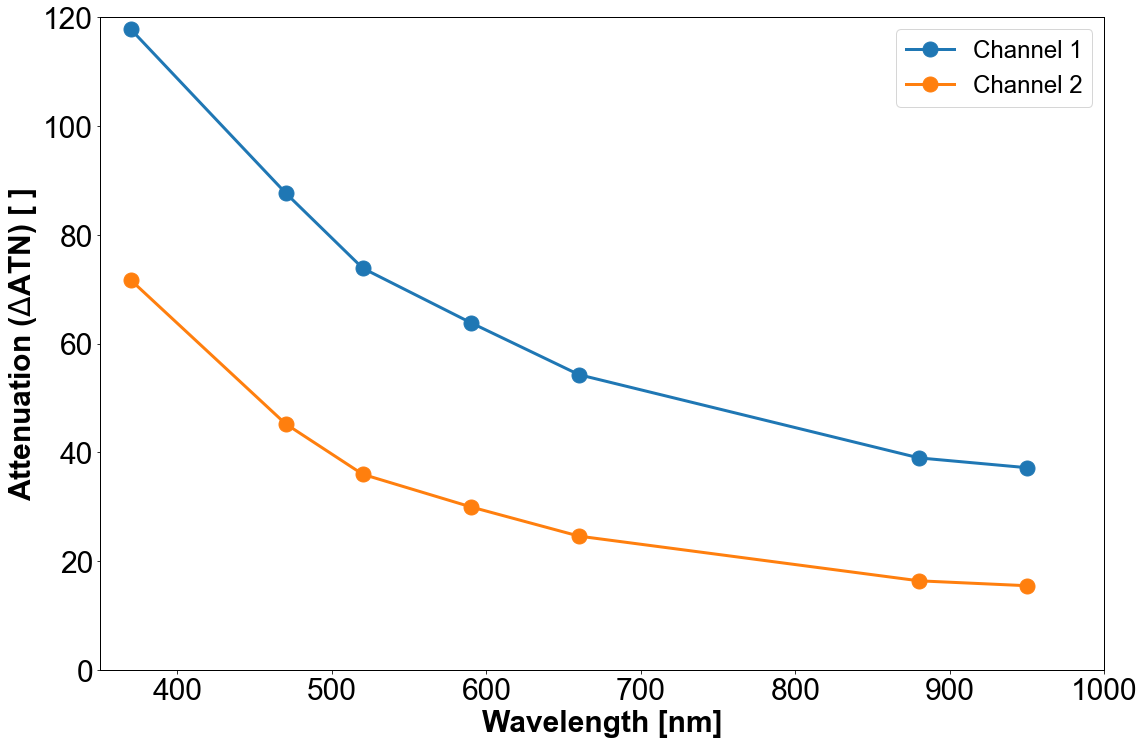

In [52]:
import matplotlib.animation as animation

fig10, ax10 = plt.subplots()
ax10.set(xlim=(350,1000),ylim=(0,120))
ax10.set_xlabel('Wavelength [nm]',fontsize=30)
ax10.set_ylabel('Attenuation ($\Delta$ATN) [ ]',fontsize=30)
time_text = ax10.text(650,90,'',fontsize = 30)
AAE1_text = ax10.text(650,80,'',fontsize = 30)
AAE2_text = ax10.text(650,70,'',fontsize = 30)

row = dATN.iloc[0]
line1, = ax10.plot(wl,row[['dA11','dA12','dA13','dA14','dA15','dA16','dA17']],'o-',ms=15,label = 'Channel 1')
line2, = ax10.plot(wl,row[['dA21','dA22','dA23','dA24','dA25','dA26','dA27']],'o-',ms=15,label = 'Channel 2')
ax10.legend(fontsize = 24)

def animate(i):
    row = dATN.iloc[i]
    line1.set_ydata(row[['dA11','dA12','dA13','dA14','dA15','dA16','dA17']])
    line2.set_ydata(row[['dA21','dA22','dA23','dA24','dA25','dA26','dA27']])
    time_text.set_text('SAMPLE START: ' + str(dATN.iloc[i].name))
    AAE1_text.set_text('AAE Channel 1: ' + ' {:.2f} [{:.2f} {:.2f}]'.format(logATN.AAE1.iloc[i],logATN.AAE1_lci.iloc[i],logATN.AAE1_uci.iloc[i]))
    AAE2_text.set_text('AAE Channel 2: ' + ' {:.2f} [{:.2f} {:.2f}]'.format(logATN.AAE2.iloc[i],logATN.AAE2_lci.iloc[i],logATN.AAE2_uci.iloc[i]))
    return line1, line2
    
ani = animation.FuncAnimation(fig10,animate,frames=len(dATN.index),blit=False,interval = 1000)
plt.show()
#ani.save("ATNvsWL.mp4")

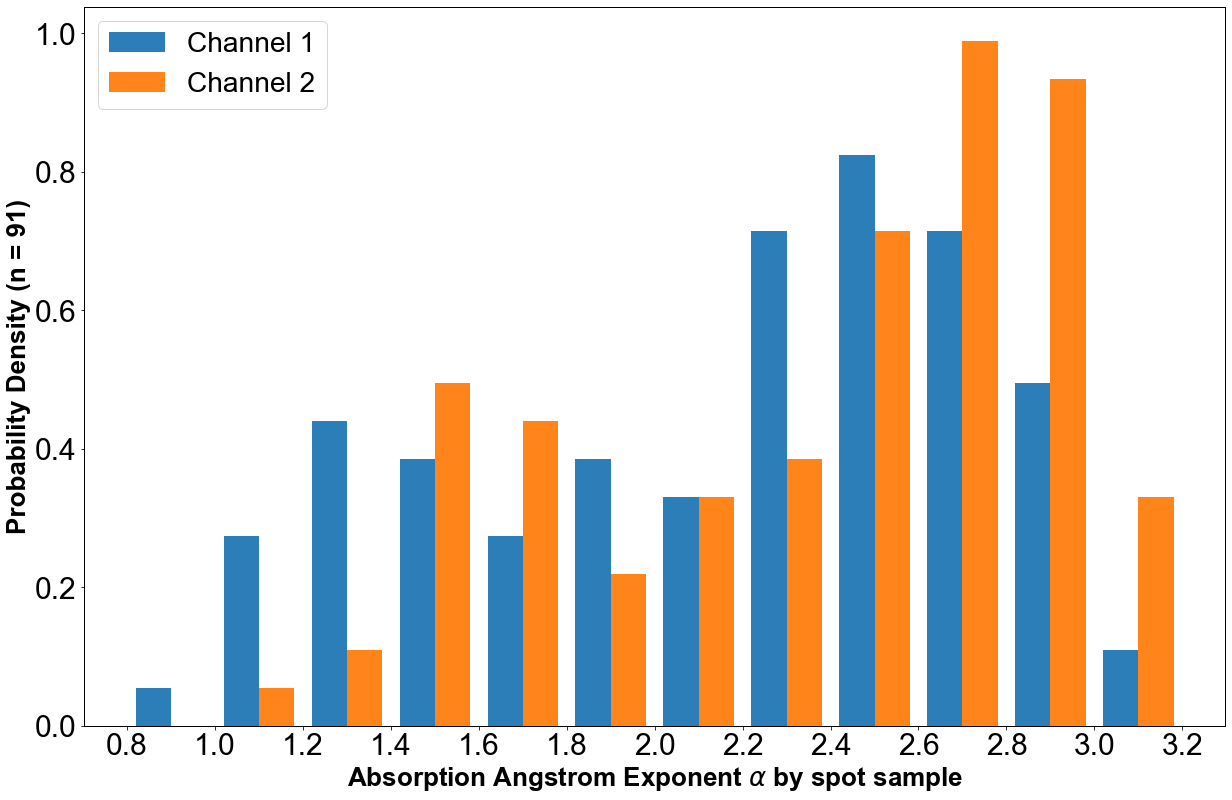

In [54]:
binsAAE = np.arange(0.8,3.2,0.2).tolist()
labelsAAE = ['Channel 1','Channel 2']
xticks = np.arange(0.8,3.2,0.2).tolist()

figH, axH = plt.subplots()
axH.hist(x = [logATN.AAE1,logATN.AAE2], bins=binsAAE,alpha = 0.95,label=labelsAAE,density = True,align='mid')
axH.set_xlabel(r'Absorption Angstrom Exponent $\alpha$ by spot sample',fontsize = 26)
axH.set_ylabel(r'Probability Density (n = 91)',fontsize = 26)
axH.set_xticks(xticks)
axH.legend(fontsize=28)
figH.tight_layout()
#figH.savefig('AAE_PD_byspotsample.png')